In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn import decomposition
from tqdm.notebook import tqdm 
from sklearn.preprocessing import StandardScaler, RobustScaler , MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import collections as cl

In [8]:
customers=pd.read_csv('customers_true.csv')
customers

CUSTOMER_ID  2018_weekly_expence  2018_weekly_purchasings  \
0      AA00312188            12.009259                 0.370370   
1      AA00312390             5.148148                 0.370370   
2      AA00325975            15.451852                 0.407407   
3      AA00336843             3.555556                 0.222222   
4      AA00339761             9.168519                 0.296296   
...           ...                  ...                      ...   
25722  YZ04556116             0.000000                 0.000000   
25723  YZ04586406             0.000000                 0.000000   
25724  YZ04658257             0.000000                 0.000000   
25725  YZ04743693             0.000000                 0.000000   
25726  YZ04933987             0.000000                 0.000000   

       2019_weekly_expence  2019_weekly_purchasings  2018_monthly_expence  \
0                10.169811                 0.264151             46.321429   
1                 6.018868                 0.339623             19.857143   
2                16.885849                 0.415094             59.600000   
3                 6.541509                 0.283019             13.714286   
4                 4.017925                 0.150943             35.364286   
...                    ...                      ...                   ...   
25722             0.886792                 0.037736              0.000000   
25723            14.323585                 0.245283              0.000000   
25724            17.783019                 0.169811              0.000000   
25725             1.591509                 0.075472              0.000000   
25726             6.358491                 0.094340              0.000000   

       2018_monthly_purchasings  2019_monthly_expence  \
0                      1.428571             44.916667   
1                      1.428571             26.583333   
2                      1.571429             74.579167   
3                      0.857143             28.891667   
4                      1.142857             17.745833   
...                         ...                   ...   
25722                  0.000000              3.916667   
25723                  0.000000             63.262500   
25724                  0.000000             78.541667   
25725                  0.000000              7.029167   
25726                  0.000000             28.083333   

       2019_monthly_purchasings  avg_expence  ...    Spring    Summer  \
0                      1.166667    36.702000  ...  0.203525  0.134323   
1                      1.500000    15.730000  ...  0.344357  0.215831   
2                      1.833333    39.897143  ...  0.221968  0.274261   
3                      1.250000    21.643182  ...  0.384050  0.202481   
4                      0.666667    29.414706  ...  0.352665  0.281052   
...                         ...          ...  ...       ...       ...   
25722                  0.166667    23.500000  ...  0.000000  1.000000   
25723                  1.083333    54.246667  ...  0.000000  0.228479   
25724                  0.750000    89.163636  ...  0.000000  0.124881   
25725                  0.333333    17.620000  ...  0.000000  0.000000   
25726                  0.416667    67.400000  ...  0.000000  0.000000   

         Winter    Acquired   Spent   FIDELTY     cheap  expensive    normal  \
0      0.313265  248.333333  2920.0  0.800000  0.278846   0.115385  0.548077   
1      0.180408  112.708333   560.0  0.966667  0.396552   0.327586  0.206897   
2      0.248897  305.909091  6602.5  0.971429  0.336585   0.160976  0.463415   
3      0.282088  133.333333  3465.0  0.454545  0.217391   0.101449  0.623188   
4      0.240197  200.625000  2015.0  1.000000  0.050847   0.389831  0.423729   
...         ...         ...     ...       ...       ...        ...       ...   
25722  0.000000  295.000000     0.0  0.500000  0.222222   0.111111  0.111111   
25723  0.215109  388.000000     0.0  0.600000  0.353659   0.182927  0.4512

In [9]:
customers.columns

Index(['CUSTOMER_ID', '2018_weekly_expence', '2018_weekly_purchasings',
       '2019_weekly_expence', '2019_weekly_purchasings',
       '2018_monthly_expence', '2018_monthly_purchasings',
       '2019_monthly_expence', '2019_monthly_purchasings', 'avg_expence',
       'CASH', 'CHECK', 'CREDIT CARD', 'DEBIT CARD', 'GIFT CARD', 'afternoon',
       'launch', 'morning', 'night', 'feriale', 'weekend', 'MEMBER_GET_MEMBER',
       'PHONE', 'STORE', 'WEB', 'OTHER_0', 'OTHER_FROZEN', 'SAUCE',
       'READY-MADE', 'POULTRY', 'BEEF_PORK', 'FISH', 'FRIES', 'VEGETABLES',
       'FRUIT', 'ACCESSORIES', 'DRINKS', 'GADGETS', 'OTHER', 'OTHER_MISSING',
       'Fall', 'Spring', 'Summer', 'Winter', 'Acquired', 'Spent', 'FIDELTY',
       'cheap', 'expensive', 'normal', 'very expensive'],
      dtype='object')

In [3]:
customers.drop(['2018_weekly_expence','2018_weekly_purchasings',
               '2018_monthly_expence','2018_monthly_purchasings'],
              axis=1,inplace=True)

In [4]:
to_scale = customers.drop('CUSTOMER_ID',axis=1)

# compare different scaling methods

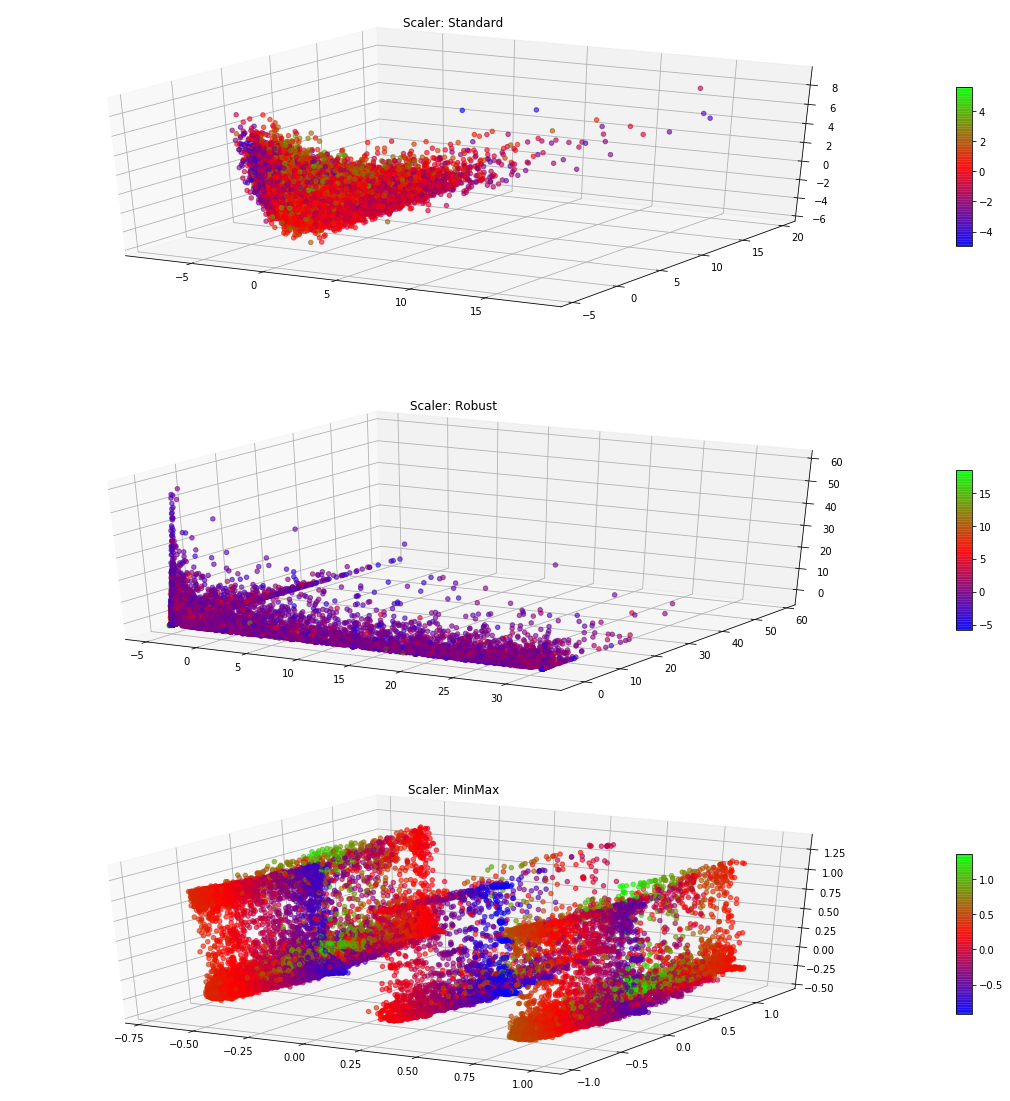

In [5]:
Scalers ={'Standard':StandardScaler(),'Robust':RobustScaler(),
         'MinMax':MinMaxScaler()}
fig = plt.figure(figsize=(20,20))
i = 1
for scaler_name, scaler in Scalers.items():
    scaler.fit(to_scale)
    customers_scaled = scaler.transform(to_scale)
    pca = decomposition.PCA(n_components=10)
    pca.fit(customers_scaled)
    pca_components = pd.DataFrame(pca.transform(customers_scaled))
    
    ax = fig.add_subplot(3, 1, i, projection='3d')
    view = ax.scatter(pca_components[0],pca_components[1],pca_components[2],alpha=0.6,
          c=pca_components[3],cmap="brg")
    ax.set_title('Scaler: {}'.format(scaler_name))
    fig.colorbar(view, shrink=0.5, aspect=10)
    
    i+=1
plt.show()  

## Cluster

In [6]:
scaler = MinMaxScaler()
scaler.fit(to_scale)
customers_scaled = scaler.transform(to_scale)
pca = decomposition.PCA(n_components=10)
pca.fit(customers_scaled)
pca_components = pca.transform(customers_scaled)
explained_variance=0
i=1
for e_v in pca.explained_variance_ratio_:
    explained_variance+=e_v
    print('component',i,'\t',explained_variance)
    i+=1

component 1 	 0.22328138039153192
component 2 	 0.36378497315596786
component 3 	 0.4839393331059121
component 4 	 0.5897504727433308
component 5 	 0.6812589445250845
component 6 	 0.7411988308725247
component 7 	 0.7902860598644065
component 8 	 0.8188375404817314
component 9 	 0.8442871650164461
component 10 	 0.8665516081135219


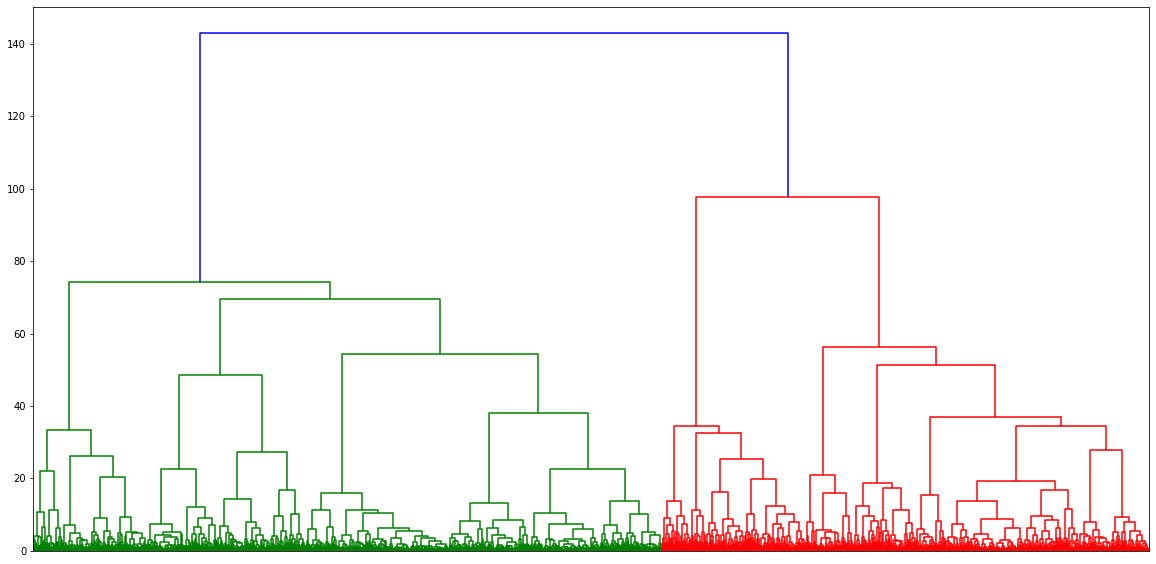

In [7]:

fig, ax = plt.subplots(figsize=(20,10))
Z = linkage(pca_components,method='ward', metric='euclidean')
dendrogram(Z, leaf_rotation=90,ax=ax,no_labels=True);

## K-means

evaluate for seed: 42



evaluate for seed: 1


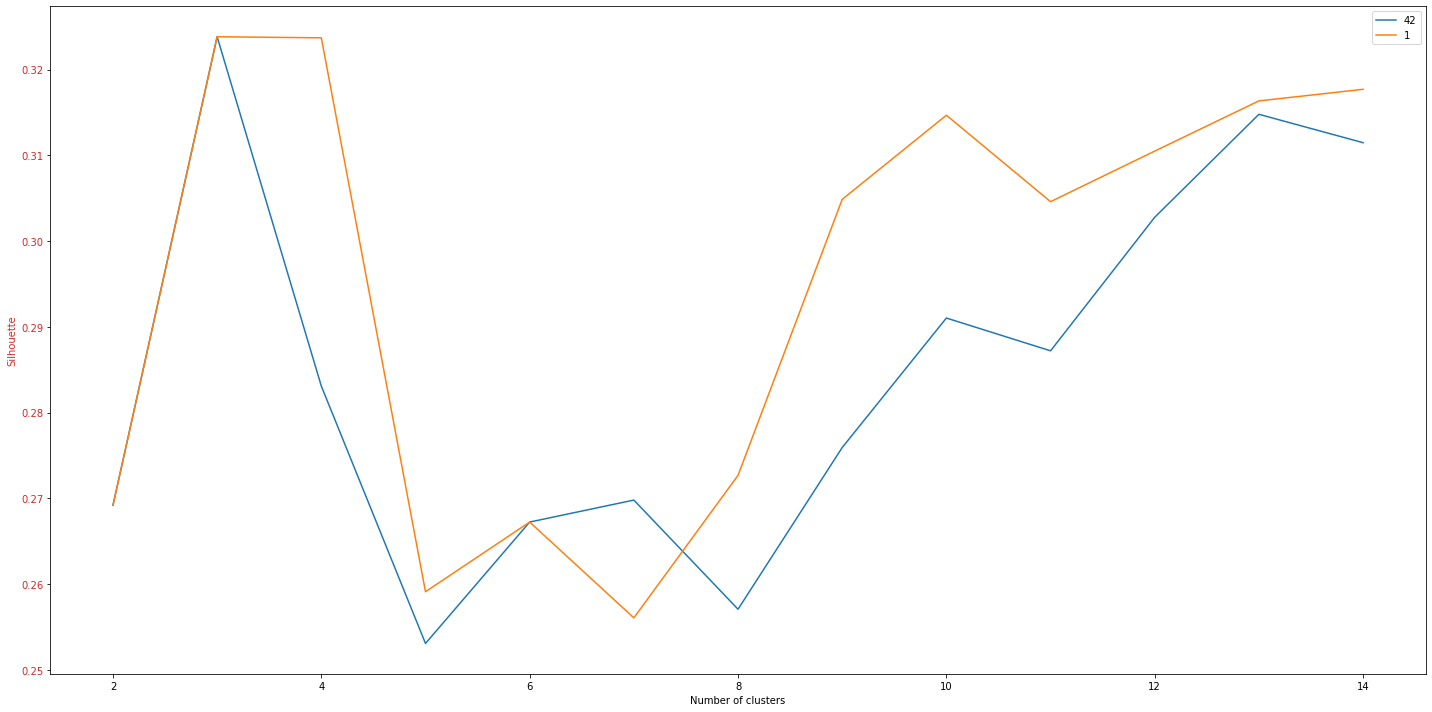

In [224]:
seeds = [42,1,309842,245,5007,409]
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_xlabel('Number of clusters')
color = 'tab:red'
ax1.set_ylabel('Silhouette', color=color)
 
for seed in seeds:
    print('evaluate for seed:',seed)
    distortions = []
    silhouette_scores = []
    with tqdm(total=len(range(1,25))) as pbar:
        for k in range(1,25):
            k_estimator = KMeans(n_clusters=k, random_state=seed)
            fitted = k_estimator.fit_predict(pca_components)
            distortions.append(k_estimator.inertia_)
            silhouette_scores.append(silhouette_score(pca_components,fitted))
            pbar.update(1)


    ax1.plot(range(1,25), silhouette_scores, label = seed)
    ax1.tick_params(axis='y', labelcolor=color)



fig.tight_layout()
plt.legend()
plt.show()


In [340]:
k_estimator = KMeans(n_clusters=1, random_state=42)

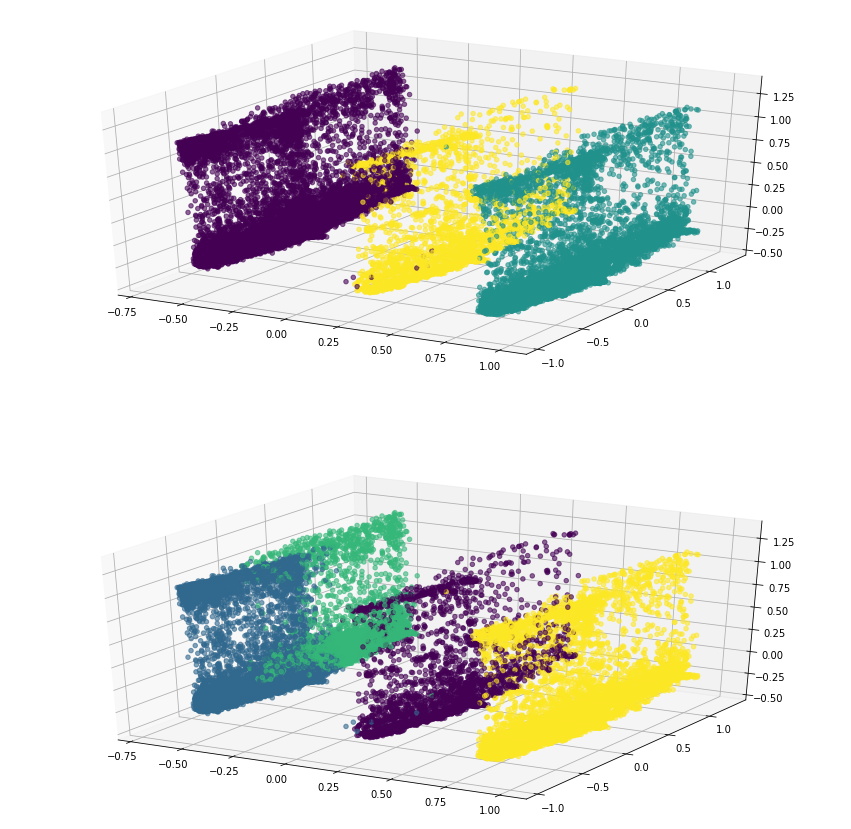

In [342]:
k_estimator = KMeans(n_clusters=3, random_state=42)
fitted_3 = k_estimator.fit_predict(pca_components)
pca_components = pd.DataFrame(pca_components)
pca_components['CLUSTER'] = fitted_3
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(211, projection='3d')
view = ax.scatter(pca_components[0],pca_components[1],pca_components[2],alpha=0.6,
          c=pca_components['CLUSTER'],)

k_estimator = KMeans(n_clusters=4, random_state=1)
fitted_4 = k_estimator.fit_predict(pca_components)
pca_components = pd.DataFrame(pca_components)
pca_components['CLUSTER'] = fitted_4

ax = fig.add_subplot(212, projection='3d')
view = ax.scatter(pca_components[0],pca_components[1],pca_components[2],alpha=0.6,
          c=pca_components['CLUSTER'],)

plt.show()

## DBSCAN

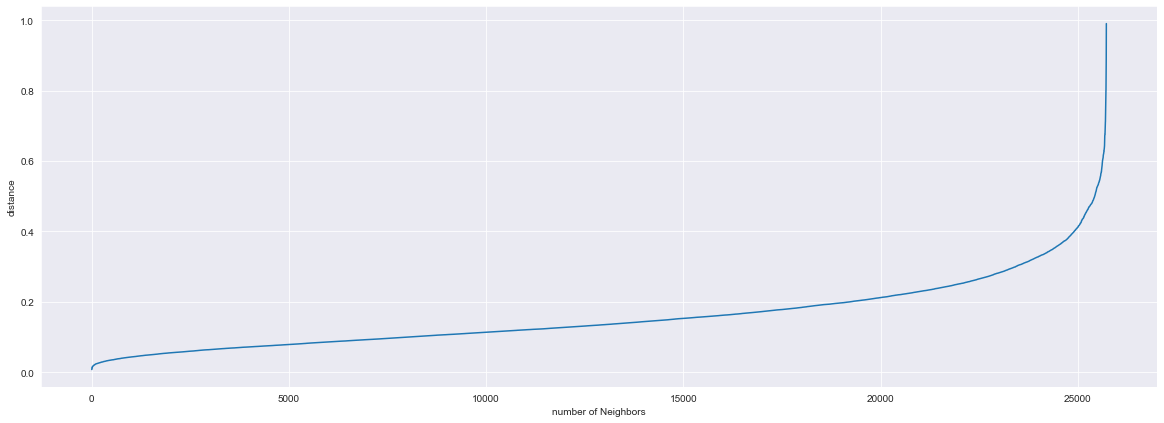

In [389]:
neigh = NearestNeighbors()
nbrs = neigh.fit(pca_components)
distances, indices = nbrs.kneighbors(pca_components)
fig=plt.figure(figsize=(20,7))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
sns.set_style('darkgrid')
plt.plot(distances);
plt.xlabel('number of Neighbors')
plt.ylabel('distance')

plt.show()

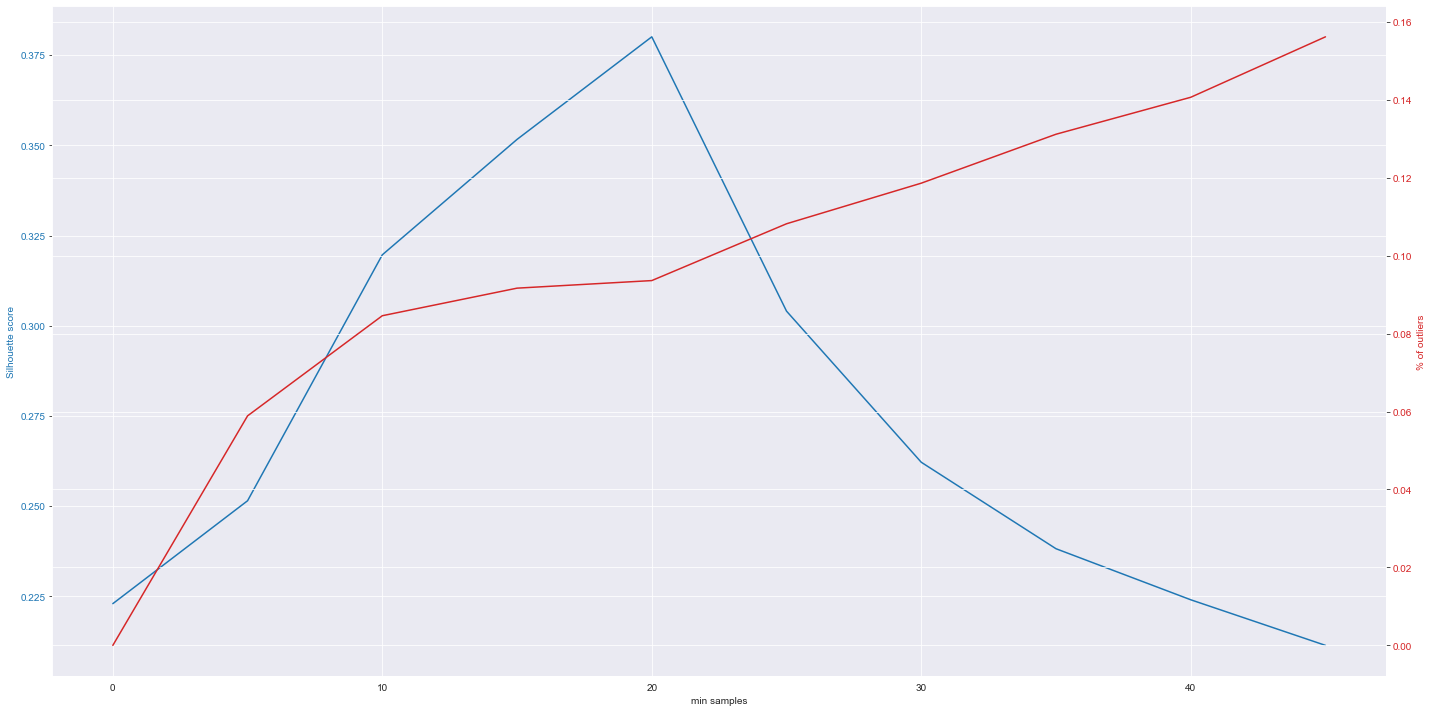

In [384]:
score = []
outliers = []
samples = np.arange(0,50, 5)
with tqdm(total=len(samples)) as pbar:
    for n in samples:
        dbs_estimator = DBSCAN(eps=0.4, min_samples=n)
        dbs_estimator.fit(pca_components)
        dbs_labels = dbs_estimator.labels_
        outliers_ = cl.Counter(dbs_labels)[-1]/(len(dbs_labels))
        score.append(silhouette_score(pca_components,dbs_labels))
        outliers.append(outliers_)
        
        pbar.update(1)

fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:blue'
ax1.set_xlabel('min samples')
ax1.set_ylabel('Silhouette score', color=color)
ax1.plot(samples,score, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('% of outliers', color=color)  
ax2.plot(samples,outliers, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

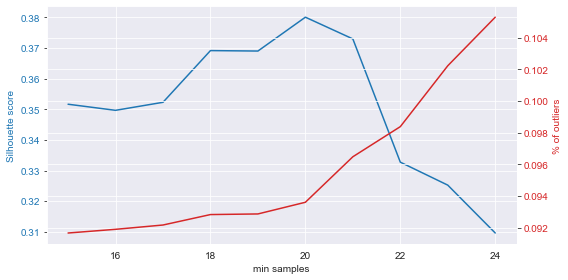

In [385]:
score = []
outliers = []
samples = np.arange(15,25, 1)
with tqdm(total=len(samples)) as pbar:
    for n in samples:
        dbs_estimator = DBSCAN(eps=0.4, min_samples=n)
        dbs_estimator.fit(pca_components)
        dbs_labels = dbs_estimator.labels_
        outliers_ = cl.Counter(dbs_labels)[-1]/(len(dbs_labels))
        score.append(silhouette_score(pca_components,dbs_labels))
        outliers.append(outliers_)
        
        pbar.update(1)

fig, ax1 = plt.subplots(figsize=(8,4))

color = 'tab:blue'
ax1.set_xlabel('min samples')
ax1.set_ylabel('Silhouette score', color=color)
ax1.plot(samples,score, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('% of outliers', color=color)  
ax2.plot(samples,outliers, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

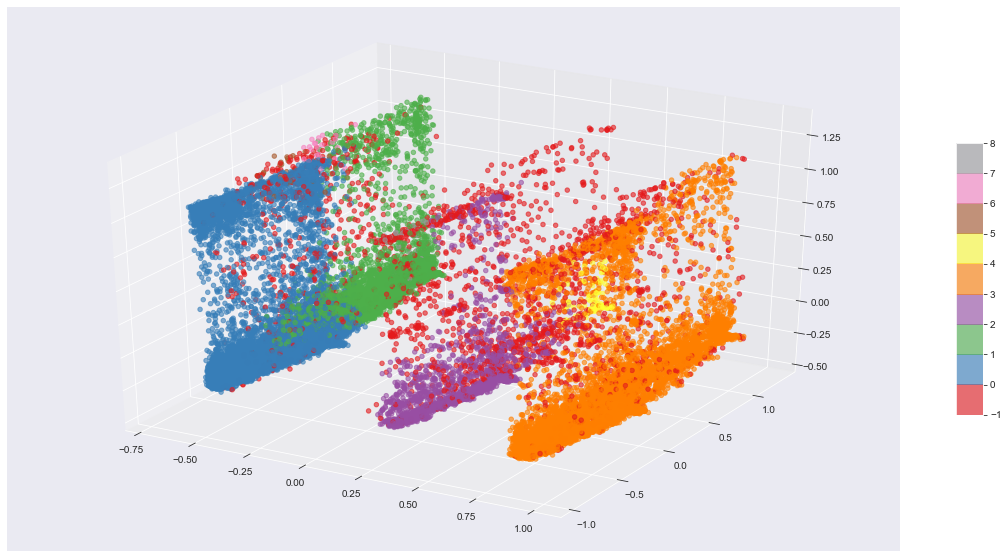

9 clusters founded, outliers in red


In [397]:
dbs_estimator = DBSCAN(eps = 0.4, min_samples=20)
dbs_labels = dbs_estimator.fit_predict(pca_components)
pca_components['CLUSTER'] = dbs_labels
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
view = ax.scatter(pca_components[0],pca_components[1],pca_components[2],alpha=0.6,
          c=pca_components['CLUSTER'],cmap="Set1")
fig.colorbar(view, shrink=0.5, aspect=10)

plt.show()
print('{} clusters founded, outliers in red'.format(len(np.unique(dbs_labels))-1))

## Inspect for 3 cluster, founded by k-means

In [480]:
pca_components['CLUSTER'] = fitted_3

In [481]:
customers['CLUSTER'] = customers.index.map(pca_components.set_index(pca_components.index)['CLUSTER'])

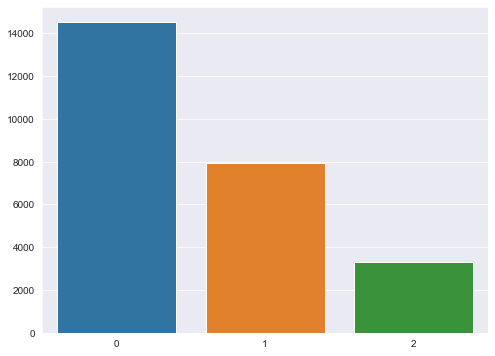

In [482]:
fig = plt.figure(figsize=(8,6))
sns.barplot(customers.CLUSTER.value_counts().index,
           customers.CLUSTER.value_counts().values);

In [429]:
to_view = ['2019_weekly_expence', '2019_weekly_purchasings',
       '2019_monthly_expence', '2019_monthly_purchasings',
          'afternoon','launch', 'morning', 'night',
          'Fall', 'Spring', 'Summer', 'Winter',
          'cheap', 'expensive', 'normal', 'very expensive',
          'CASH', 'CHECK', 'CREDIT CARD', 'DEBIT CARD',
           'GIFT CARD','feriale', 'weekend','FIDELTY',
          'Acquired', 'Spent','avg_expence']

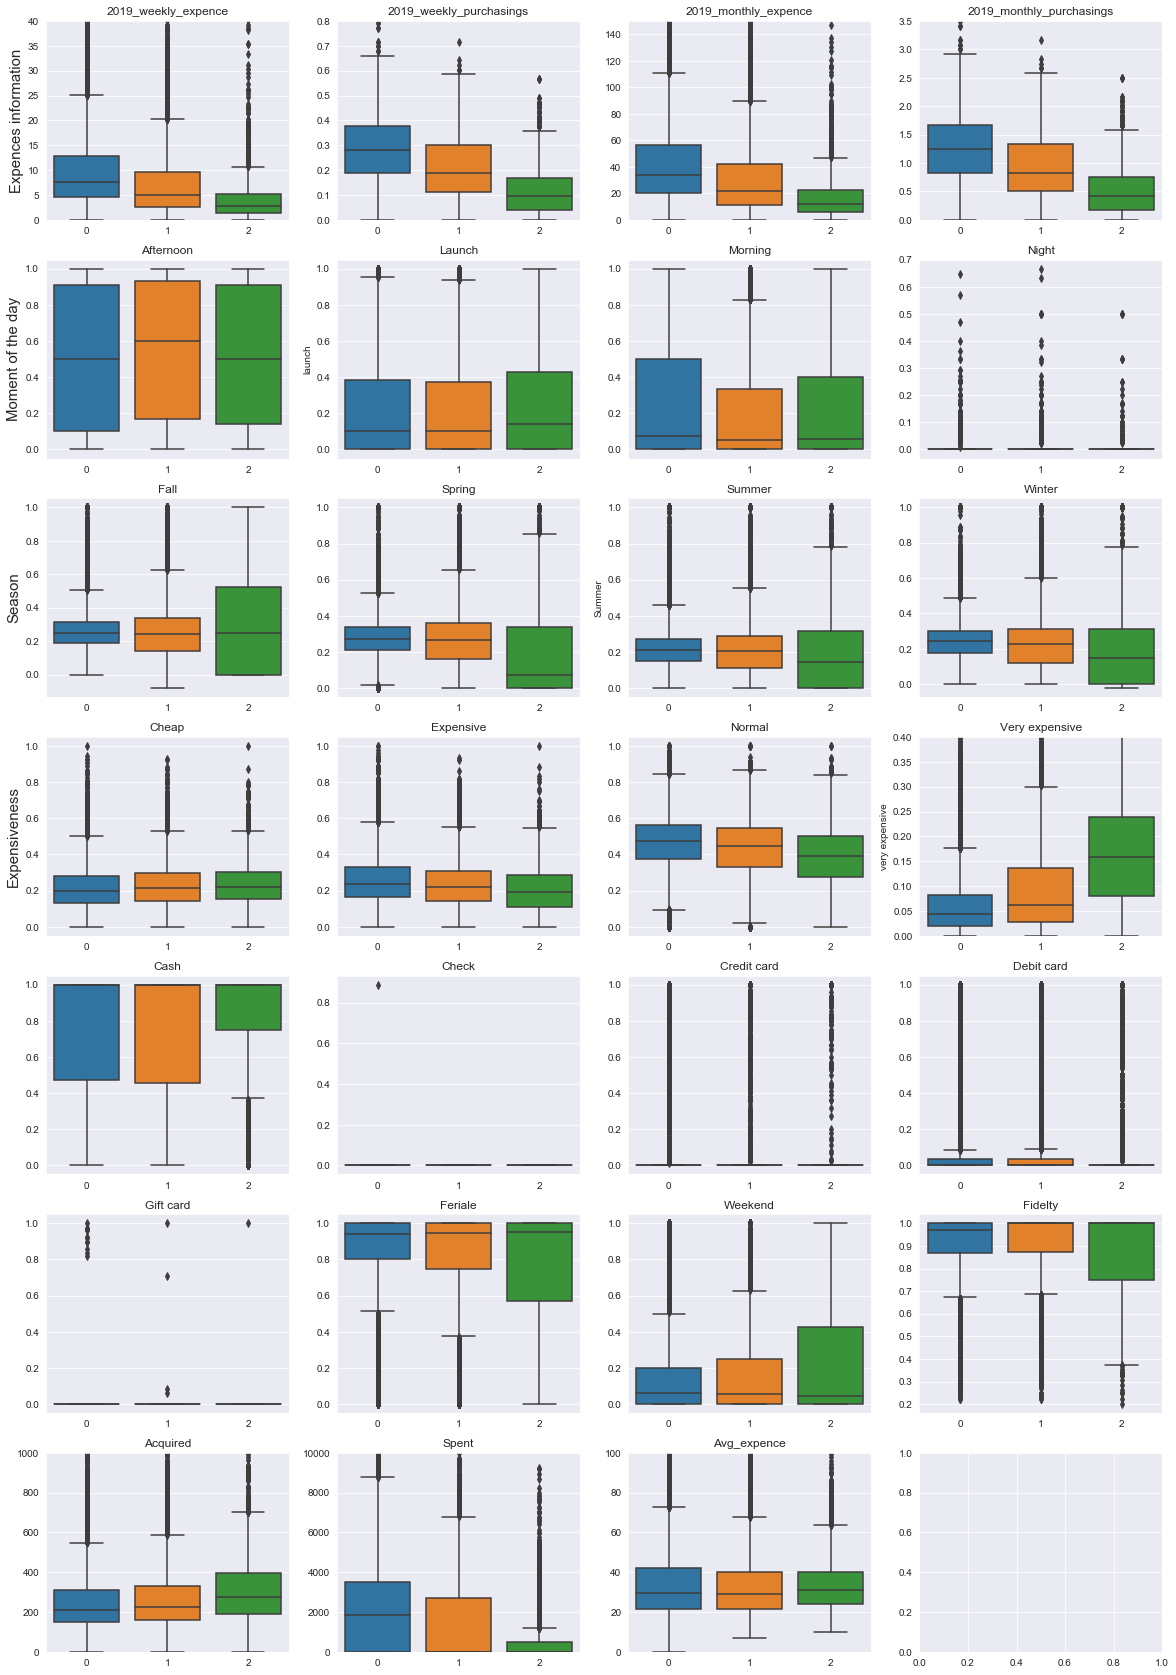

In [439]:
fig, ax = plt.subplots(figsize=(20,30), nrows=7, ncols=4)
counter = 0

for col in to_view:

    j = counter%4; i = counter//4;
    
    view_week_expence = customers[['CLUSTER',col]]
    view_week_expence.sort_values('CLUSTER')
    sns.boxplot(x='CLUSTER',y=col,data = view_week_expence,ax=ax[i,j])
    ax[i,j].set_xlabel('')
    ax[i,j].set_title(col.capitalize())
    
    if i == j:
        if i == 0:
            ax[i,j].set_ylabel('Expences information',fontsize=15)
        if i == 1:
            ax[i,j-1].set_ylabel('Moment of the day',fontsize=15)
        if i == 2:
            ax[i,j-2].set_ylabel('Season',fontsize=15)
        if i == 3:
            ax[i,j-3].set_ylabel('Expensiveness',fontsize=15)

    else:
            
        ax[i,j].set_ylabel('')
        
    if (col.capitalize() == 'Avg_expence'):
        ax[i,j].set_ylim(0,100)
    if (col.capitalize() == '2019_weekly_expence'):
        ax[i,j].set_ylim(0,40)
    if (col.capitalize() == '2019_weekly_purchasings'):
        ax[i,j].set_ylim(0,0.8)
    if (col.capitalize() == '2019_monthly_expence'):
        ax[i,j].set_ylim(0,150)
    if (col.capitalize() == '2019_monthly_purchasings'):
        ax[i,j].set_ylim(0,3.5)
    if (col.capitalize() == 'Very expensive'):
        ax[i,j].set_ylim(0,0.4)
    if (col.capitalize() == 'Acquired'):
        ax[i,j].set_ylim(0,1000)
    if (col.capitalize() == 'Spent'):
        ax[i,j].set_ylim(0,10000)
        
    counter+=1

### inspect for category distributions in cluster

In [478]:
sales_detail = pd.read_csv('sales_detail_category.csv')

In [ ]:
sales_detail['CLUSTER'] = sales_detail.CUSTOMER_ID.map(customers.set_index(['CUSTOMER_ID'])['CLUSTER'])

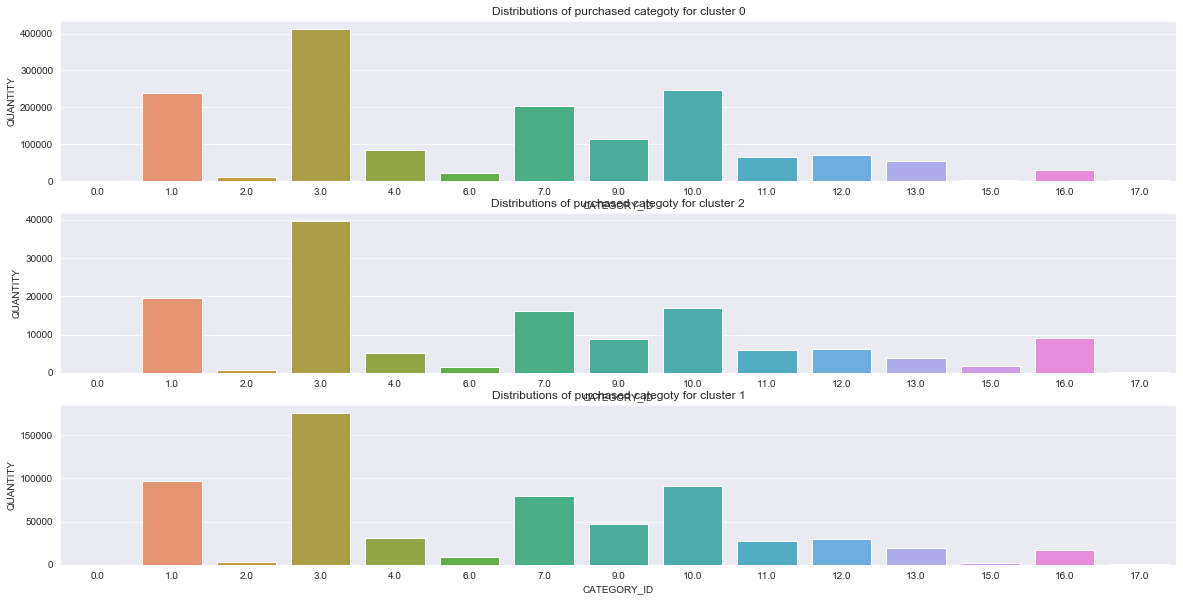

In [468]:
fig, ax = plt.subplots(figsize=(20,10), nrows=3, ncols=1)
i = 0
clusters = sales_detail.CLUSTER.unique()
for cluster in clusters:
    view = sales_detail[sales_detail.CLUSTER==cluster]
    view_category = view[['CATEGORY_ID','QUANTITY']].groupby('CATEGORY_ID').sum()
    categories = view_category.index
    sns.barplot(categories,view_category.QUANTITY,ax=ax[i])
    ax[i].set_title('Distributions of purchased categoty for cluster {}'.format(cluster))
    i += 1

## Inspect for 10 clusters, founded by DBSCAN
(It is possible to consider 10 cluster, since the distributions of outliers is quite 
homogeneous)

In [469]:
pca_components['CLUSTER'] = dbs_labels
customers['CLUSTER'] = customers.index.map(pca_components.set_index(pca_components.index)['CLUSTER'])

In [470]:
view_specials = customers[customers.CLUSTER ==5]
for i in range(6,9):
    view = customers[customers.CLUSTER ==i]
    view_specials = pd.concat([view_specials,view],axis=0)


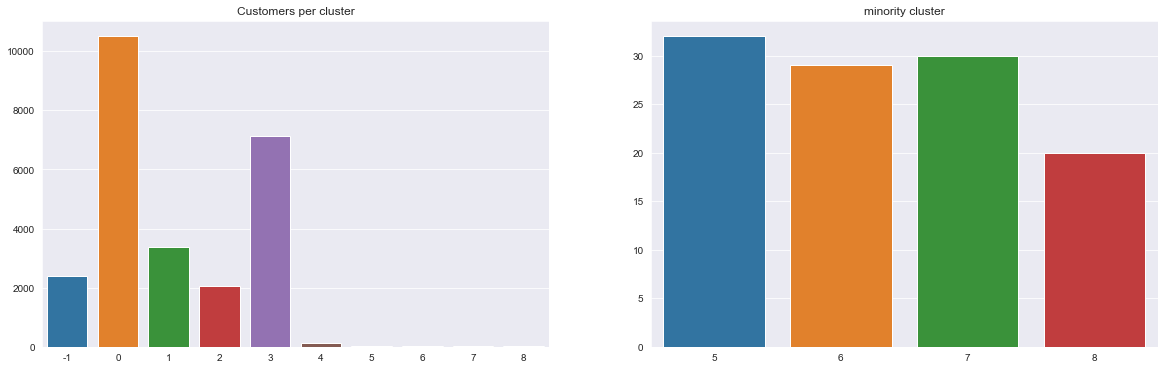

In [471]:
fig, ax = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
sns.barplot(customers.CLUSTER.value_counts().index,
           customers.CLUSTER.value_counts().values,ax=ax[0]);
sns.barplot(view_specials.CLUSTER.value_counts().index,
           view_specials.CLUSTER.value_counts().values,ax=ax[1]);
ax[0].set_title('Customers per cluster')
ax[1].set_title('minority cluster')
plt.show()

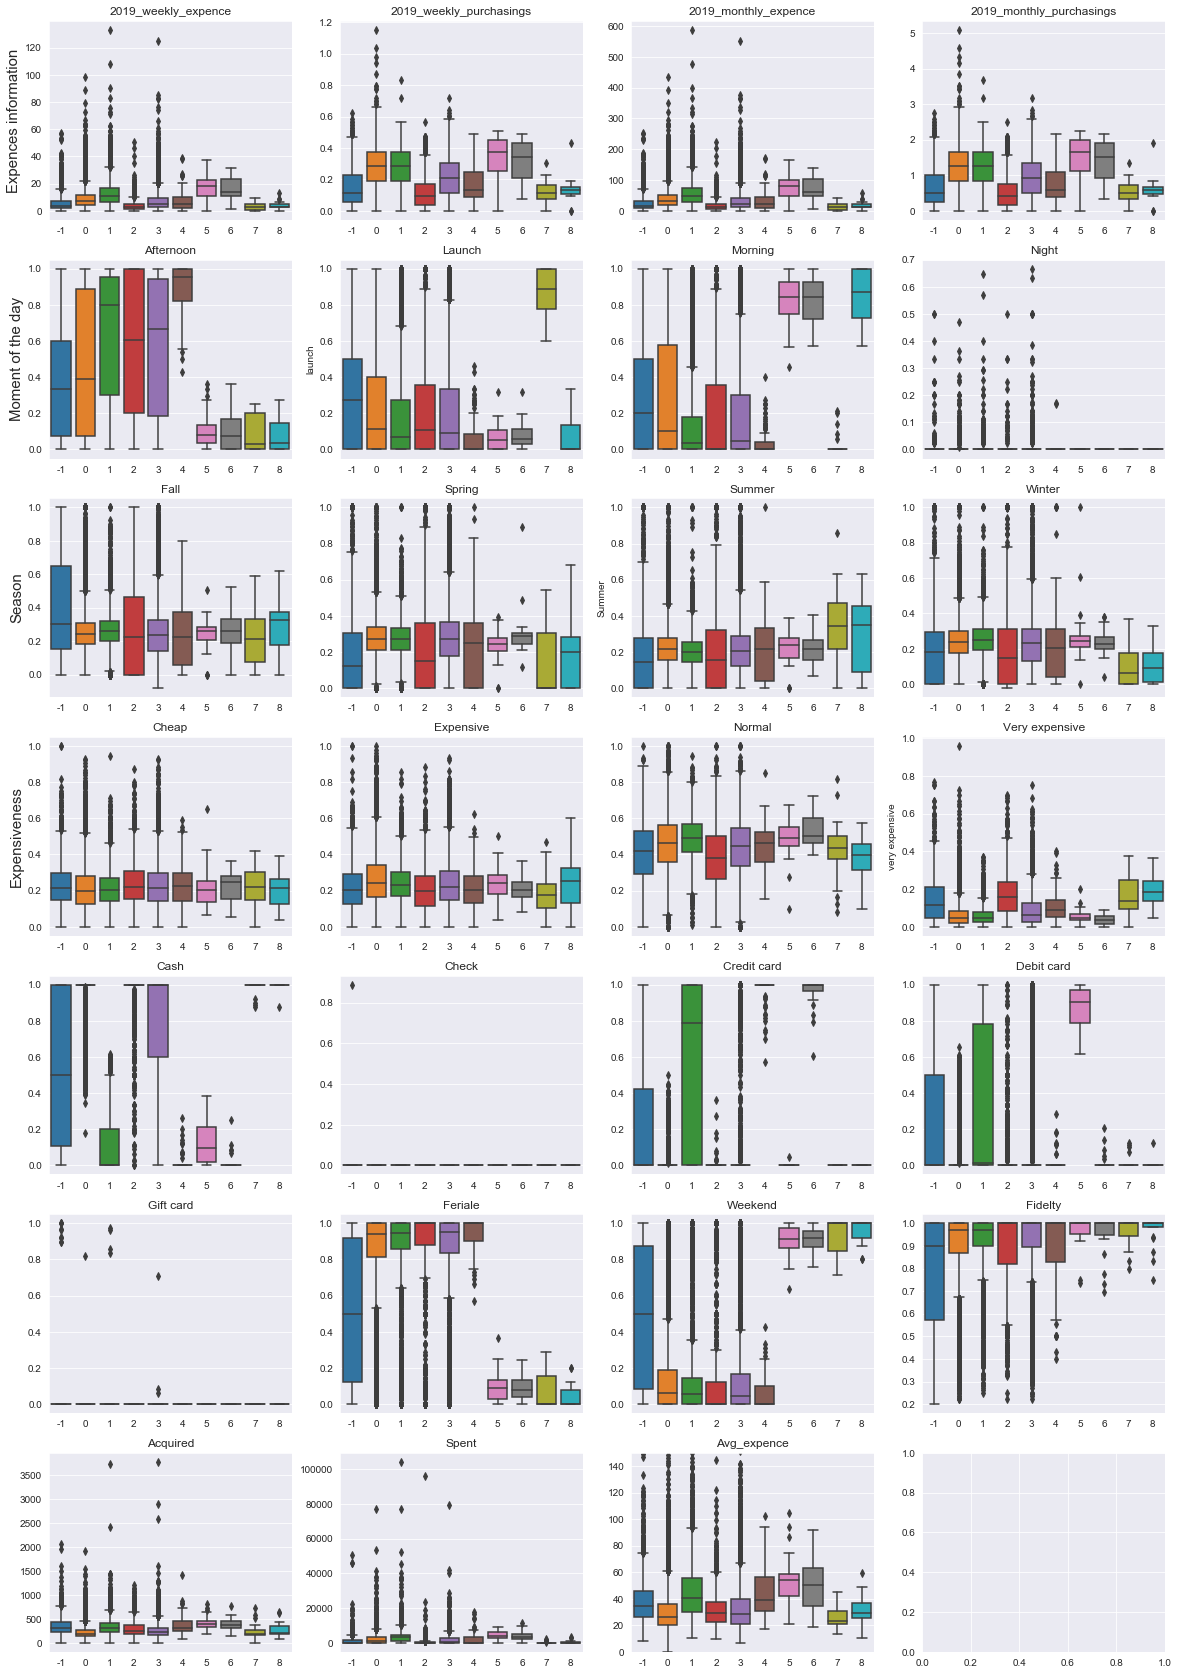

In [401]:
fig, ax = plt.subplots(figsize=(20,30), nrows=7, ncols=4)
counter = 0

for col in to_view:

    j = counter%4; i = counter//4;
    
    view_week_expence = customers[['CLUSTER',col]]
    view_week_expence.sort_values('CLUSTER')
    sns.boxplot(x='CLUSTER',y=col,data = view_week_expence,ax=ax[i,j])
    ax[i,j].set_xlabel('')
    ax[i,j].set_title(col.capitalize())
    
    if i == j:
        if i == 0:
            ax[i,j].set_ylabel('Expences information',fontsize=15)
        if i == 1:
            ax[i,j-1].set_ylabel('Moment of the day',fontsize=15)
        if i == 2:
            ax[i,j-2].set_ylabel('Season',fontsize=15)
        if i == 3:
            ax[i,j-3].set_ylabel('Expensiveness',fontsize=15)

    else:
            
        ax[i,j].set_ylabel('')
        
    if (col.capitalize() == 'Avg_expence'):
        ax[i,j].set_ylim(0,150)

    
    counter+=1

In [472]:
sales_detail['CLUSTER'] = sales_detail.CUSTOMER_ID.map(customers.set_index(['CUSTOMER_ID'])['CLUSTER'])

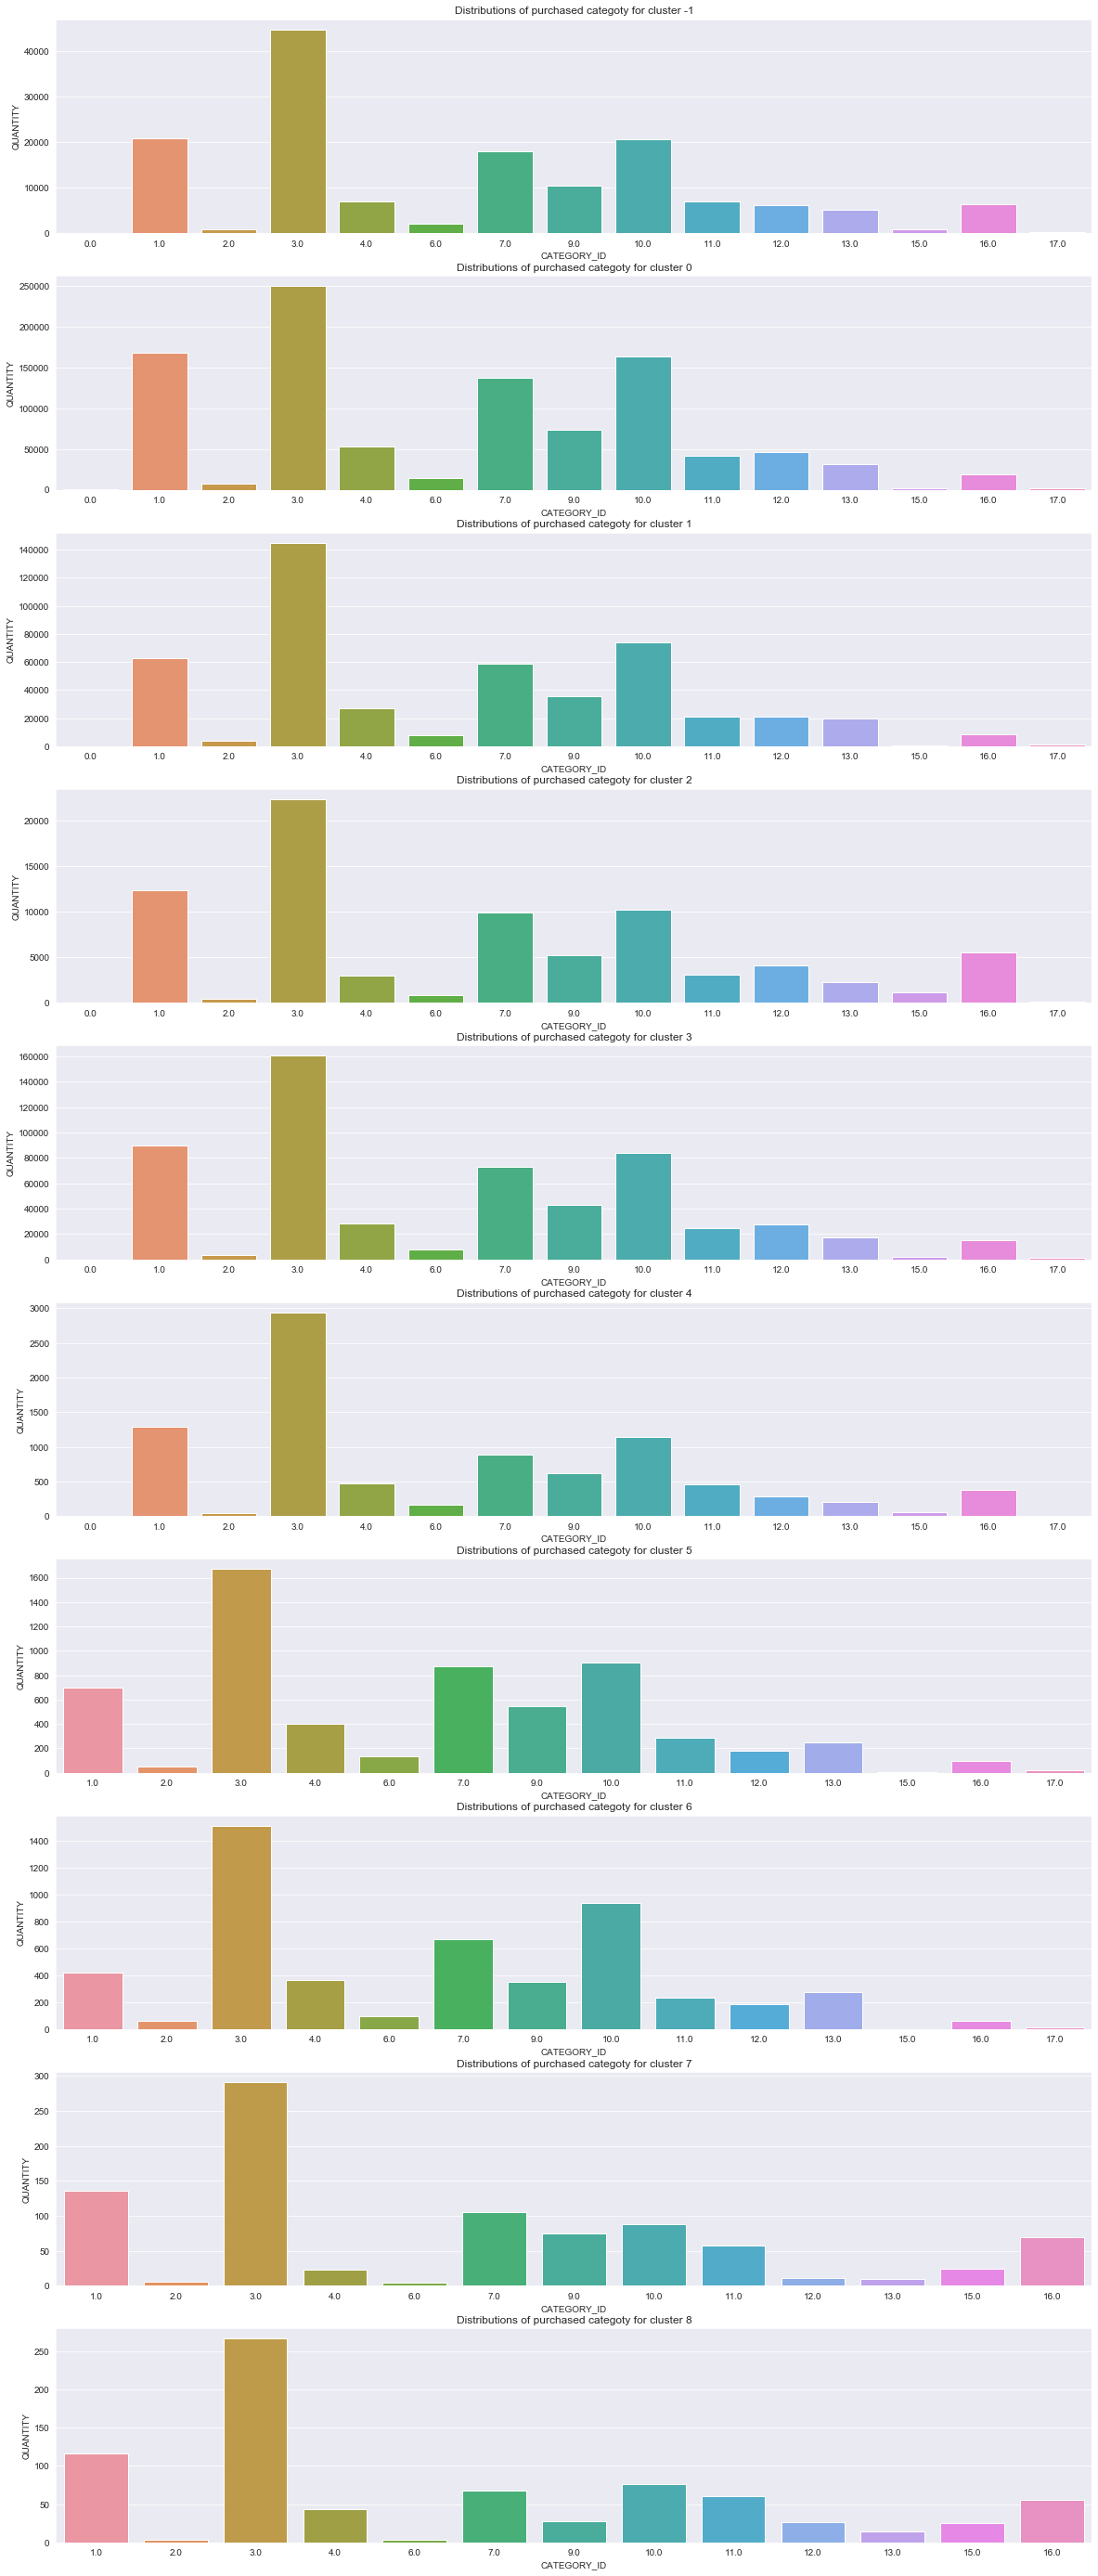

In [477]:
fig, ax = plt.subplots(figsize=(20,50), nrows=10, ncols=1)
i = 0
clusters = np.sort(sales_detail.CLUSTER.unique())
for cluster in clusters:
    view = sales_detail[sales_detail.CLUSTER==cluster]
    view_category = view[['CATEGORY_ID','QUANTITY']].groupby('CATEGORY_ID').sum()
    categories = view_category.index
    sns.barplot(categories,view_category.QUANTITY,ax=ax[i])
    ax[i].set_title('Distributions of purchased categoty for cluster {}'.format(cluster))
    i += 1

### Analyzing single cluster in K-means- result

#### global overview

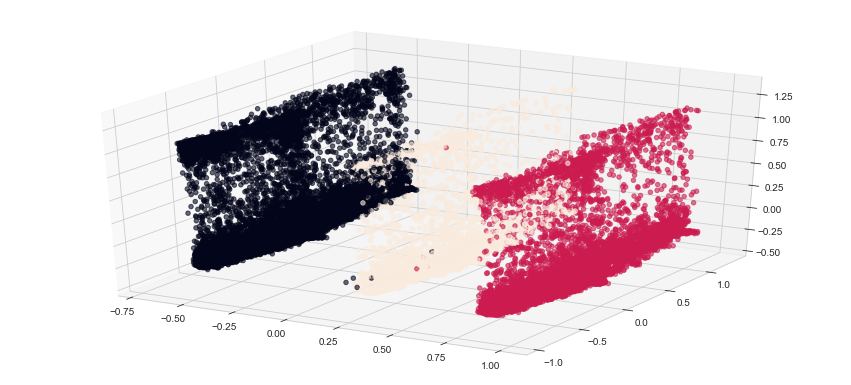

In [635]:
k_estimator = KMeans(n_clusters=3, random_state=42)
fitted_3 = k_estimator.fit_predict(pca_components)
pca_components = pd.DataFrame(pca_components)
pca_components['CLUSTER'] = fitted_3
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(211, projection='3d')
view = ax.scatter(pca_components[0],pca_components[1],pca_components[2],alpha=0.6,
          c=pca_components['CLUSTER'],)

plt.show()

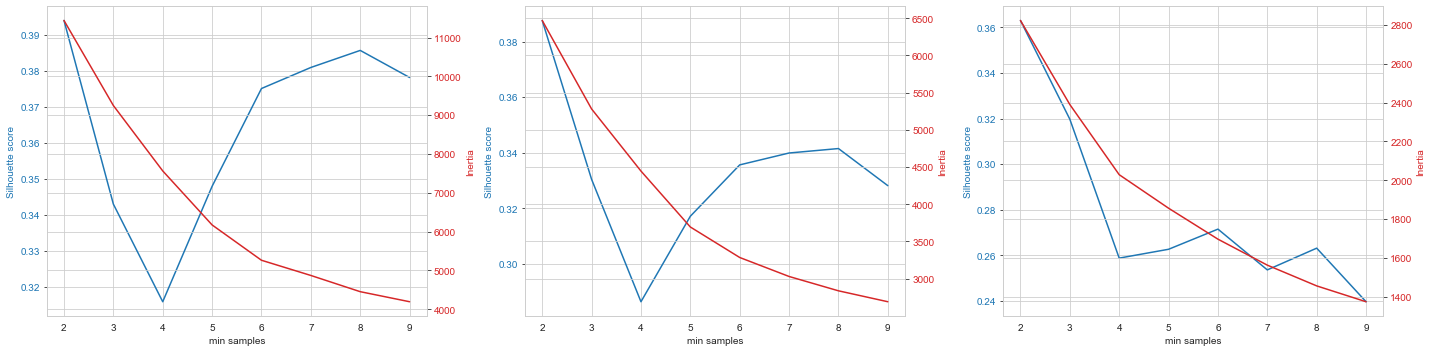

In [629]:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)
i=0
for cluster in np.sort(pca_components.CLUSTER.unique()):
    cluster_0 = pca_components[pca_components.CLUSTER == cluster]
    distortions = []
    silhouette_scores = []

    with tqdm(total=len(range(2,10))) as pbar:
        for k in range(2,10):
            k_estimator = KMeans(n_clusters=k, random_state=42)
            fitted = k_estimator.fit_predict(cluster_0)
            distortions.append(k_estimator.inertia_)
            silhouette_scores.append(silhouette_score(cluster_0,fitted))
            pbar.update(1)


    color = 'tab:blue'
    ax[i].set_xlabel('min samples')
    ax[i].set_ylabel('Silhouette score', color=color)
    ax[i].plot(range(2,10),silhouette_scores, color=color)
    ax[i].tick_params(axis='y', labelcolor=color)

    ax2 = ax[i].twinx()  

    color = 'tab:red'
    ax2.set_ylabel('Inertia', color=color)  
    ax2.plot(range(2,10),distortions, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    i+=1
    
plt.show()


#### separate cluster with k-means

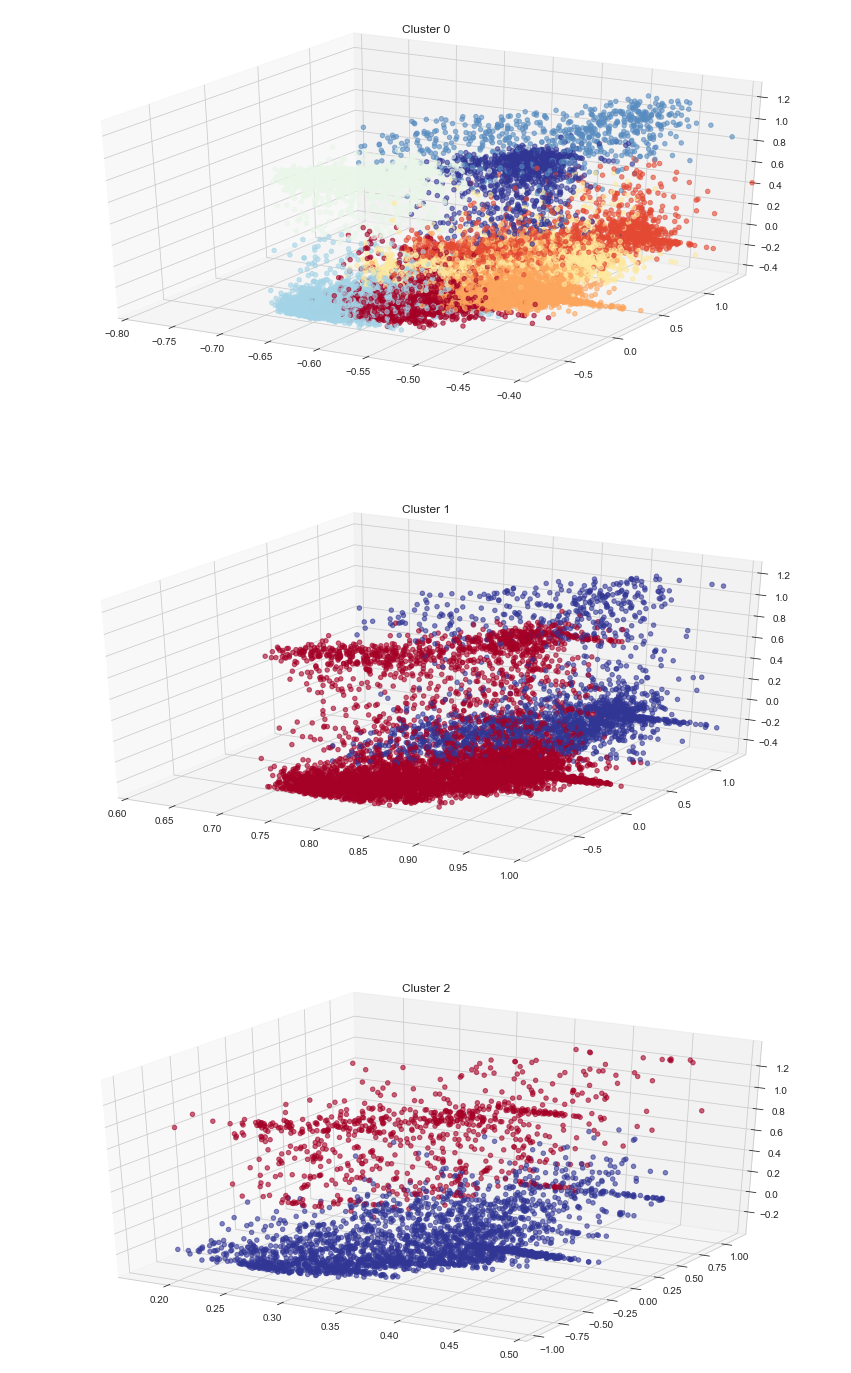

In [636]:
fig = plt.figure(figsize=(15,25))
sns.set_style('whitegrid')

                                    # cluster 0
cluster_0 = pca_components[pca_components.CLUSTER == 0]
k_estimator = KMeans(n_clusters=8, random_state=42)
sub_cluster_0 = k_estimator.fit_predict(cluster_0)
cluster_0 = pd.DataFrame(cluster_0)
cluster_0['CLUSTER'] = sub_cluster_0


ax = fig.add_subplot(311, projection='3d')
view = ax.scatter(cluster_0[0],cluster_0[1],cluster_0[2],alpha=0.6,
          c=cluster_0['CLUSTER'],cmap='RdYlBu')

ax.set_title('Cluster 0')
ax.set_xlim(-0.8,-0.4)
                                    # cluster 1
cluster_0 = pca_components[pca_components.CLUSTER == 1]

k_estimator = KMeans(n_clusters=2, random_state=4)
sub_cluster_1 = k_estimator.fit_predict(cluster_0)
cluster_0 = pd.DataFrame(cluster_0)
cluster_0['CLUSTER'] = sub_cluster_1

ax = fig.add_subplot(312, projection='3d')
view = ax.scatter(cluster_0[0],cluster_0[1],cluster_0[2],alpha=0.6,
          c=cluster_0['CLUSTER'],cmap='RdYlBu')
ax.set_title('Cluster 1')
ax.set_xlim(0.6,1)

                                    # cluster 2            
cluster_0 = pca_components[pca_components.CLUSTER == 2]

k_estimator = KMeans(n_clusters=2, random_state=42)
sub_cluster_2 = k_estimator.fit_predict(cluster_0)
cluster_0 = pd.DataFrame(cluster_0)
cluster_0['CLUSTER'] = sub_cluster_2

ax = fig.add_subplot(313, projection='3d')
view = ax.scatter(cluster_0[0],cluster_0[1],cluster_0[2],alpha=0.6,
          c=cluster_0['CLUSTER'],cmap='RdYlBu')

ax.set_title('Cluster 2')
plt.show()

#### separate cluster with DBSCAN

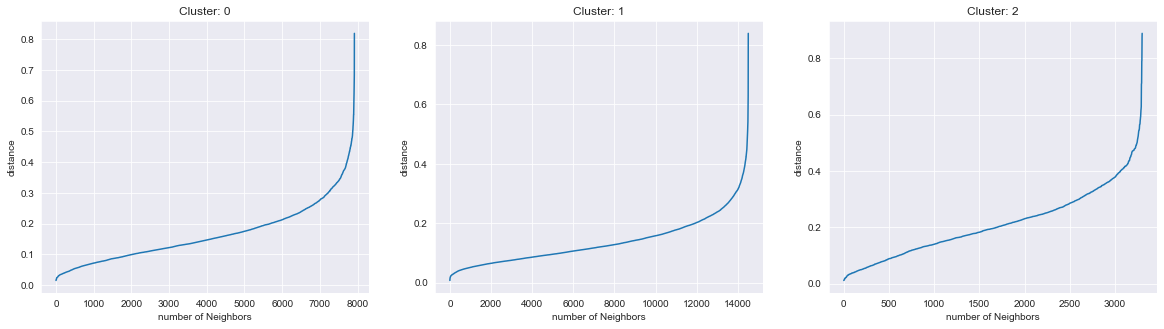

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [577]:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)
sns.set_style('darkgrid');
i=0
for cluster in np.sort(pca_components.CLUSTER.unique()):

    cluster_0 = pca_components[pca_components.CLUSTER == cluster]
    neigh = NearestNeighbors()
    nbrs = neigh.fit(cluster_0)
    distances, indices = nbrs.kneighbors(cluster_0)
    fig=plt.figure(figsize=(10,5))
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]

    ax[i].plot(distances);
    ax[i].set_title('Cluster: {}'.format(cluster));
    ax[i].set_xlabel('number of Neighbors');
    ax[i].set_ylabel('distance');
    i+=1
plt.show();

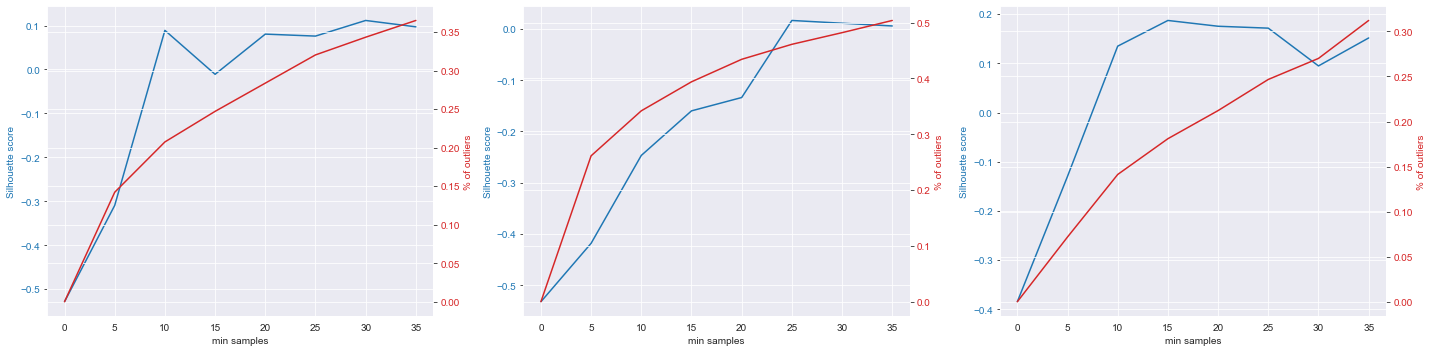

In [580]:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)
i=0
epss = [0.3,0.2,0.45]
for cluster in np.sort(pca_components.CLUSTER.unique()):
    cluster_0 = pca_components[pca_components.CLUSTER == cluster]
    score = []
    outliers = []
    samples = np.arange(0,40, 5)
    with tqdm(total=len(samples)) as pbar:
        for n in samples:
            dbs_estimator = DBSCAN(eps=epss[i], min_samples=n)
            dbs_estimator.fit(cluster_0)
            dbs_labels = dbs_estimator.labels_
            outliers_ = cl.Counter(dbs_labels)[-1]/(len(dbs_labels))
            score.append(silhouette_score(cluster_0,dbs_labels))
            outliers.append(outliers_)

            pbar.update(1)


    color = 'tab:blue'
    ax[i].set_xlabel('min samples')
    ax[i].set_ylabel('Silhouette score', color=color)
    ax[i].plot(samples,score, color=color)
    ax[i].tick_params(axis='y', labelcolor=color)

    ax2 = ax[i].twinx()  

    color = 'tab:red'
    ax2.set_ylabel('% of outliers', color=color)  
    ax2.plot(samples,outliers, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    i+=1
plt.show()

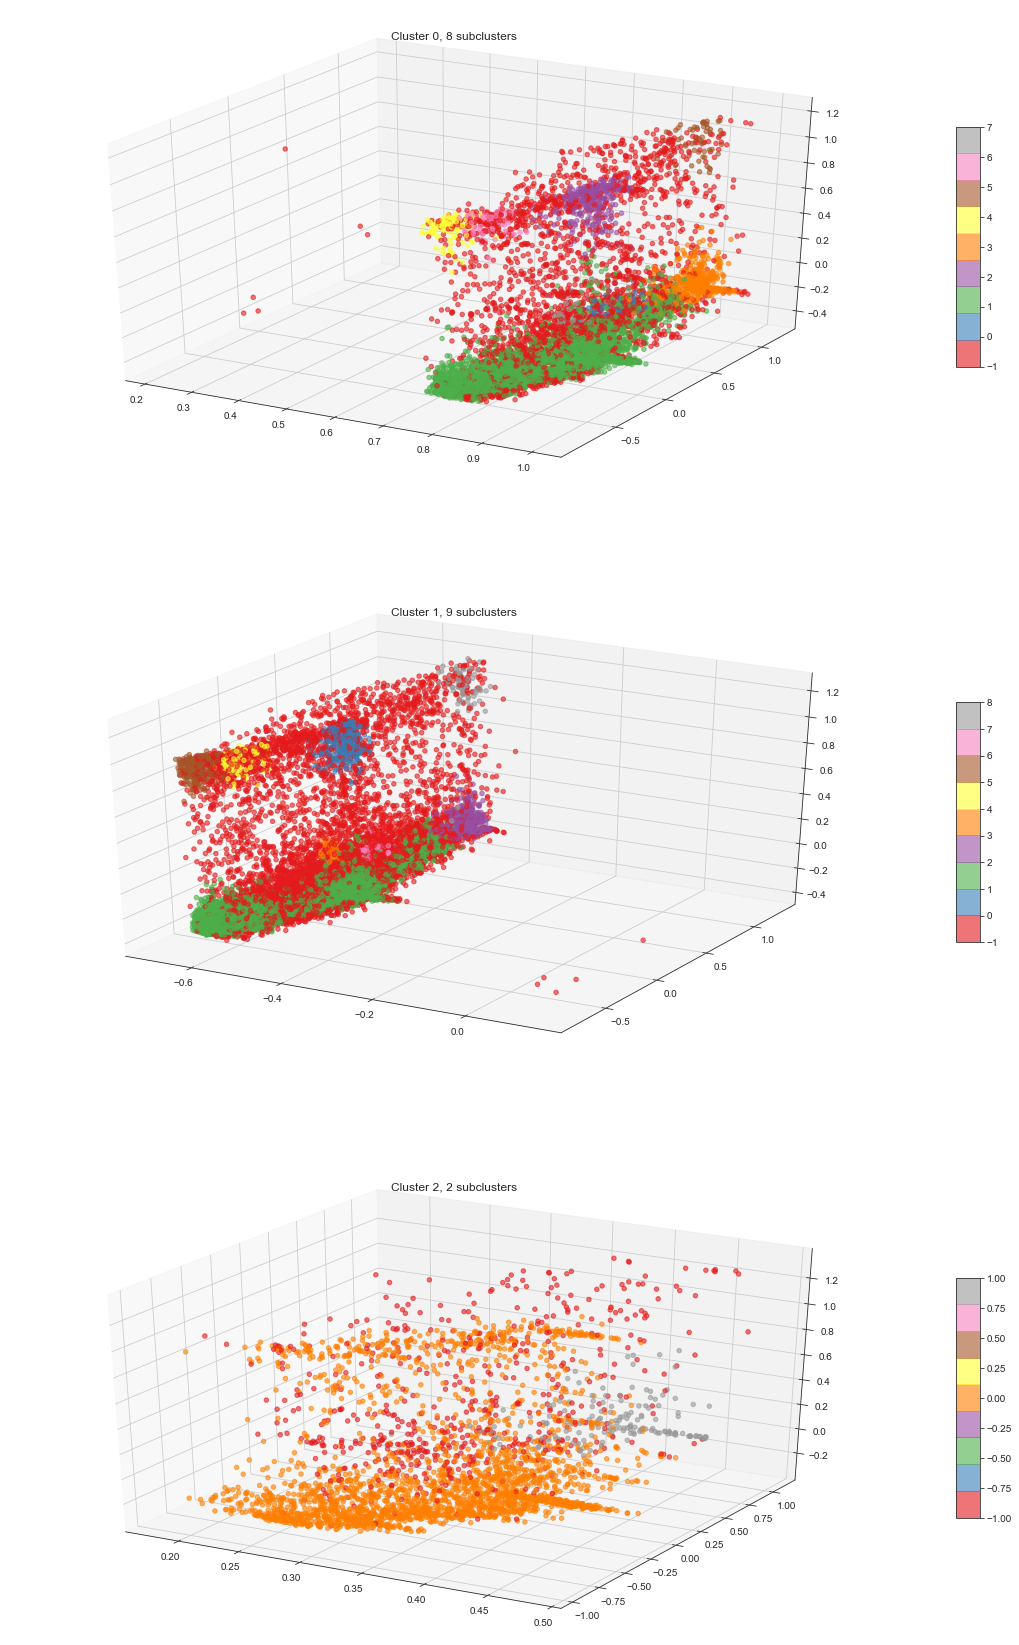

In [583]:
fig = plt.figure(figsize=(20,30))
sns.set_style('white');
                                    # cluster 0
cluster_0 = pca_components[pca_components.CLUSTER == 0]
dbs_estimator = DBSCAN(eps = epss[0], min_samples=30)
dbs_labels = dbs_estimator.fit_predict(cluster_0)
cluster_0 = pd.DataFrame(cluster_0)
cluster_0['CLUSTER'] = dbs_labels

ax = fig.add_subplot(311, projection='3d')
view = ax.scatter(cluster_0[0],cluster_0[1],cluster_0[2],alpha=0.6,
          c=cluster_0['CLUSTER'],cmap="Set1")
fig.colorbar(view, shrink=0.5, aspect=10)
ax.set_title('Cluster 0, {} subclusters'.format(len(np.unique(dbs_labels))-1))

                                # cluster 1
cluster_0 = pca_components[pca_components.CLUSTER == 1]
dbs_estimator = DBSCAN(eps = epss[1], min_samples=25)
dbs_labels = dbs_estimator.fit_predict(cluster_0)
cluster_0 = pd.DataFrame(cluster_0)
cluster_0['CLUSTER'] = dbs_labels

ax = fig.add_subplot(312, projection='3d')
view = ax.scatter(cluster_0[0],cluster_0[1],cluster_0[2],alpha=0.6,
          c=cluster_0['CLUSTER'],cmap="Set1")
fig.colorbar(view, shrink=0.5, aspect=10)
ax.set_title('Cluster 1, {} subclusters'.format(len(np.unique(dbs_labels))-1))

                                # cluster 2
cluster_0 = pca_components[pca_components.CLUSTER == 2]
dbs_estimator = DBSCAN(eps = epss[2], min_samples=15)
dbs_labels = dbs_estimator.fit_predict(cluster_0)
cluster_0 = pd.DataFrame(cluster_0)
cluster_0['CLUSTER'] = dbs_labels

ax = fig.add_subplot(313, projection='3d')
view = ax.scatter(cluster_0[0],cluster_0[1],cluster_0[2],alpha=0.6,
          c=cluster_0['CLUSTER'],cmap="Set1")
fig.colorbar(view, shrink=0.5, aspect=10)
ax.set_title('Cluster 2, {} subclusters'.format(len(np.unique(dbs_labels))-1))

plt.show()


# Inspect subclusters founded by k-means

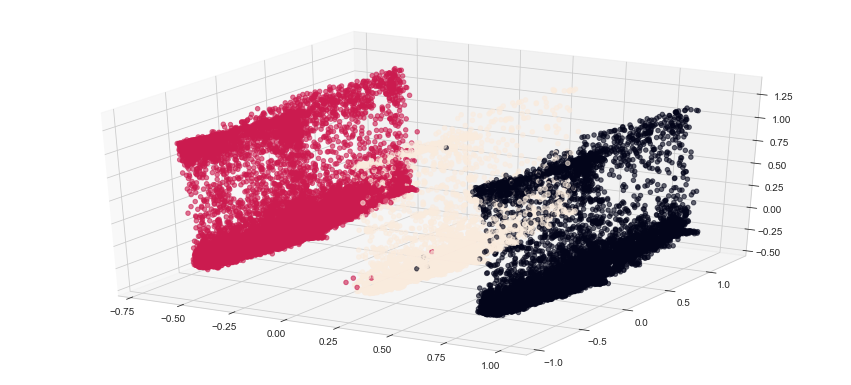

In [637]:
k_estimator = KMeans(n_clusters=3, random_state=42)
fitted_3 = k_estimator.fit_predict(pca_components)
pca_components = pd.DataFrame(pca_components)
pca_components['CLUSTER'] = fitted_3
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(211, projection='3d')
view = ax.scatter(pca_components[0],pca_components[1],pca_components[2],alpha=0.6,
          c=pca_components['CLUSTER'],)

plt.show()


In [642]:
customers['MACRO'] = customers.index.map(pca_components.set_index(pca_components.index)['CLUSTER'])

In [643]:
pca_components['subcluster'] = np.zeros(len(pca_components))


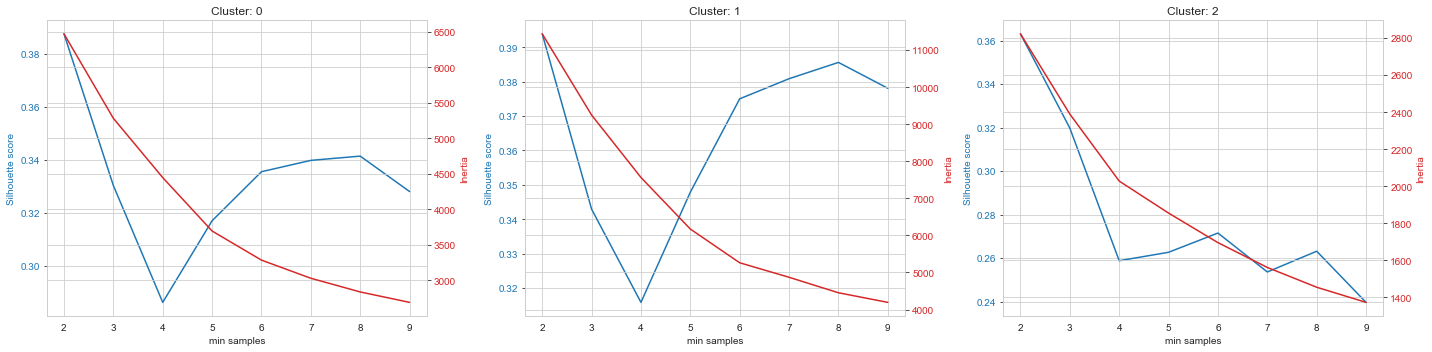

In [641]:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)
i=0
for cluster in np.sort(pca_components.CLUSTER.unique()):
    cluster_0 = pca_components[pca_components.CLUSTER == cluster]
    distortions = []
    silhouette_scores = []

    with tqdm(total=len(range(2,10))) as pbar:
        for k in range(2,10):
            k_estimator = KMeans(n_clusters=k, random_state=42)
            fitted = k_estimator.fit_predict(cluster_0)
            distortions.append(k_estimator.inertia_)
            silhouette_scores.append(silhouette_score(cluster_0,fitted))
            pbar.update(1)


    color = 'tab:blue'
    ax[i].set_xlabel('min samples')
    ax[i].set_ylabel('Silhouette score', color=color)
    ax[i].plot(range(2,10),silhouette_scores, color=color)
    ax[i].tick_params(axis='y', labelcolor=color)
    ax[i].set_title('Cluster: {}'.format(cluster))
    ax2 = ax[i].twinx()  

    color = 'tab:red'
    ax2.set_ylabel('Inertia', color=color)  
    ax2.plot(range(2,10),distortions, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    i+=1
    
plt.show()


### compute subclusters

In [644]:

                                    # cluster 0
cluster_0 = pca_components[pca_components.CLUSTER == 0]

k_estimator = KMeans(n_clusters=2, random_state=42)
sub_cluster_0 = k_estimator.fit_predict(cluster_0)
pca_components.loc[cluster_0.index,'subcluster']=sub_cluster_0


                                    # cluster 1
cluster_1 = pca_components[pca_components.CLUSTER == 1]

k_estimator = KMeans(n_clusters=8, random_state=42)
sub_cluster_1 = k_estimator.fit_predict(cluster_1)
pca_components.loc[cluster_1.index,'subcluster']=sub_cluster_1+2


                                    # cluster 2            
cluster_2 = pca_components[pca_components.CLUSTER == 2]

k_estimator = KMeans(n_clusters=2, random_state=42)
sub_cluster_2 = k_estimator.fit_predict(cluster_2)
pca_components.loc[cluster_2.index,'subcluster']=sub_cluster_2+4


In [645]:
customers['CLUSTER'] = customers.index.map(pca_components.set_index(pca_components.index)['subcluster'])

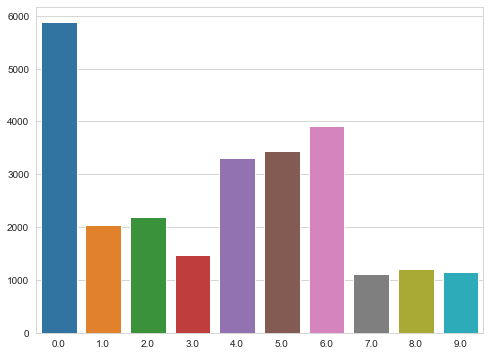

In [646]:
fig = plt.figure(figsize=(8,6))
sns.barplot(customers.CLUSTER.value_counts().index,
           customers.CLUSTER.value_counts().values);

In [647]:
to_view = ['2019_weekly_expence', '2019_weekly_purchasings',
       '2019_monthly_expence', '2019_monthly_purchasings',
          'afternoon','launch', 'morning', 'night',
          'Fall', 'Spring', 'Summer', 'Winter',
          'cheap', 'expensive', 'normal', 'very expensive',
          'CASH', 'CHECK', 'CREDIT CARD', 'DEBIT CARD',
           'GIFT CARD','feriale', 'weekend','FIDELTY',
          'Acquired', 'Spent','avg_expence']

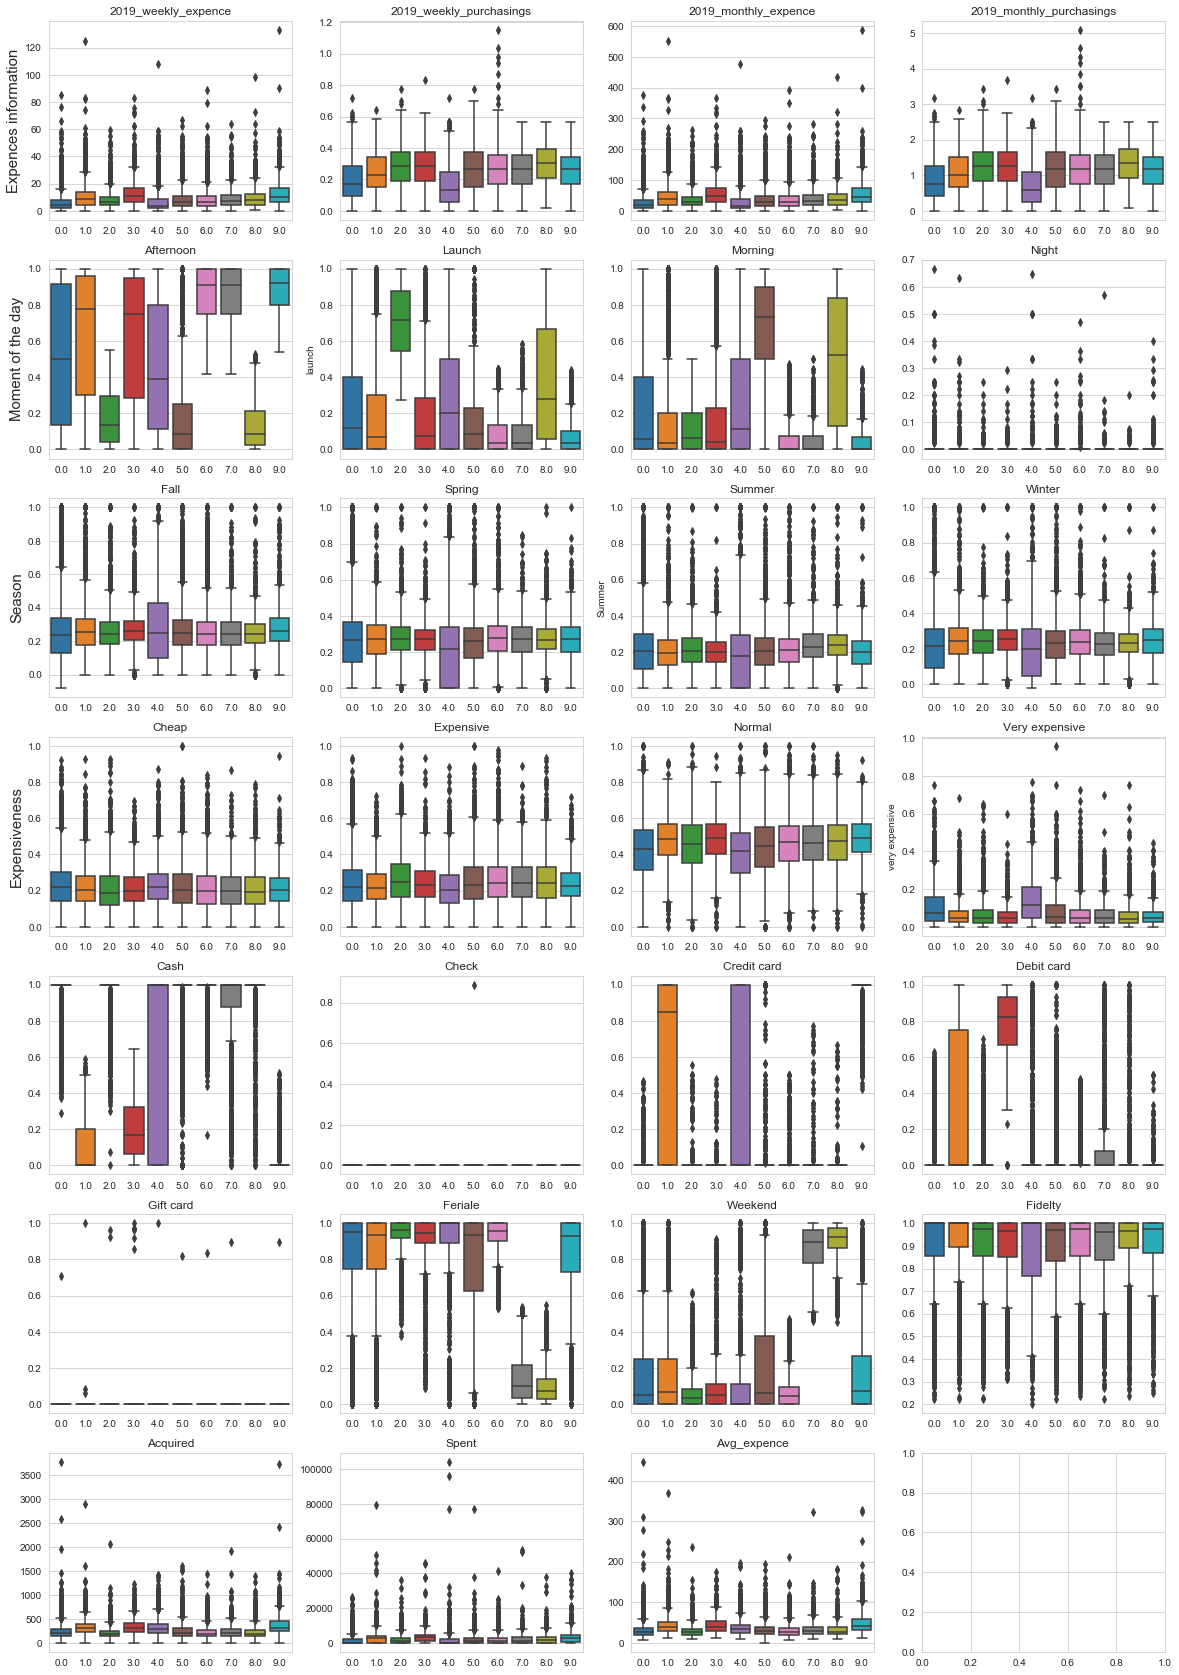

In [648]:
fig, ax = plt.subplots(figsize=(20,30), nrows=7, ncols=4)
counter = 0

for col in to_view:

    j = counter%4; i = counter//4;
    
    view_week_expence = customers[['CLUSTER',col]]
    view_week_expence.sort_values('CLUSTER')
    sns.boxplot(x='CLUSTER',y=col,data = view_week_expence,ax=ax[i,j])
    ax[i,j].set_xlabel('')
    ax[i,j].set_title(col.capitalize())
    
    if i == j:
        if i == 0:
            ax[i,j].set_ylabel('Expences information',fontsize=15)
        if i == 1:
            ax[i,j-1].set_ylabel('Moment of the day',fontsize=15)
        if i == 2:
            ax[i,j-2].set_ylabel('Season',fontsize=15)
        if i == 3:
            ax[i,j-3].set_ylabel('Expensiveness',fontsize=15)

    else:
            
        ax[i,j].set_ylabel('')
        

        
    counter+=1

In [659]:
sales_detail['CLUSTER'] = sales_detail.CUSTOMER_ID.map(customers.set_index(['CUSTOMER_ID'])['CLUSTER'])

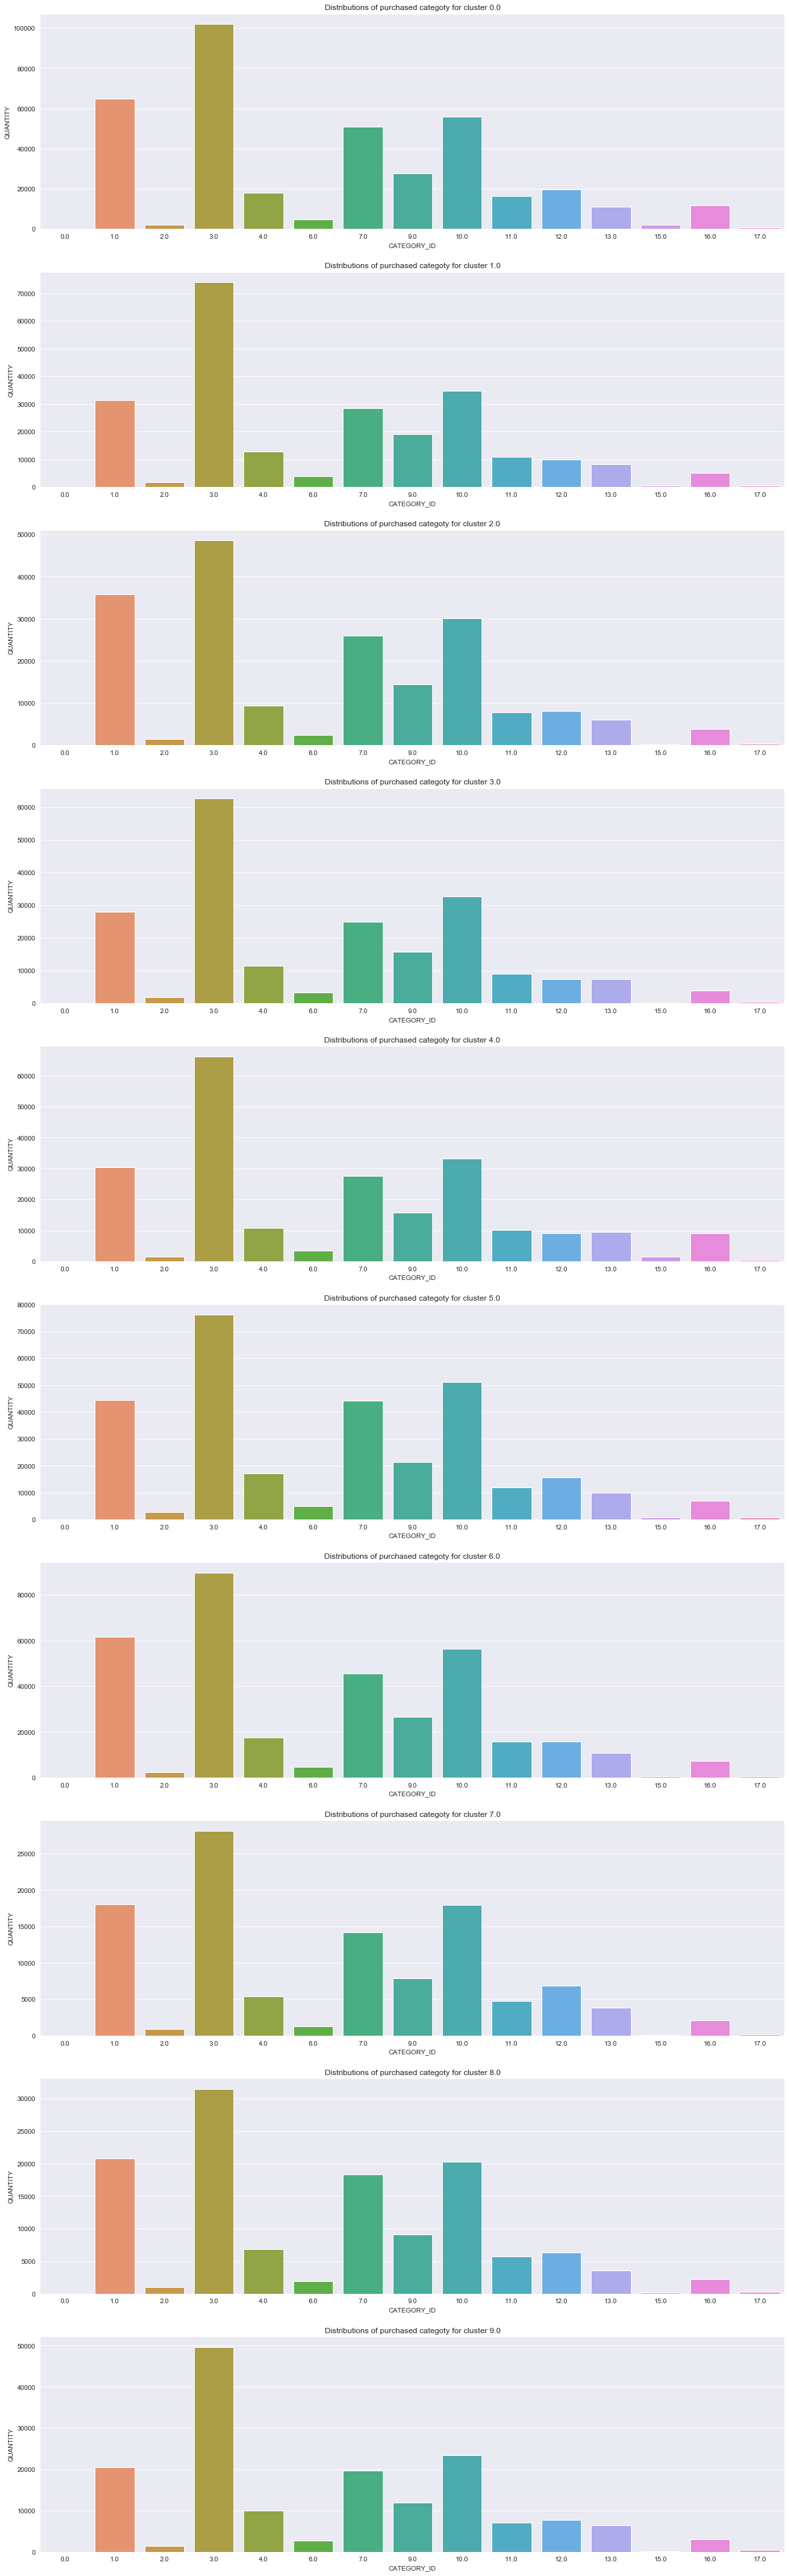

In [663]:
fig, ax = plt.subplots(figsize=(20,70), nrows=10, ncols=1)
i = 0
clusters = np.sort(sales_detail.CLUSTER.unique())
for cluster in clusters:
    view = sales_detail[sales_detail.CLUSTER==cluster]
    view_category = view[['CATEGORY_ID','QUANTITY']].groupby('CATEGORY_ID').sum()
    categories = view_category.index
    sns.barplot(categories,view_category.QUANTITY,ax=ax[i])
    ax[i].set_title('Distributions of purchased categoty for cluster {}'.format(cluster))
    i += 1

# Inspect subclusters founded by DBSCAN

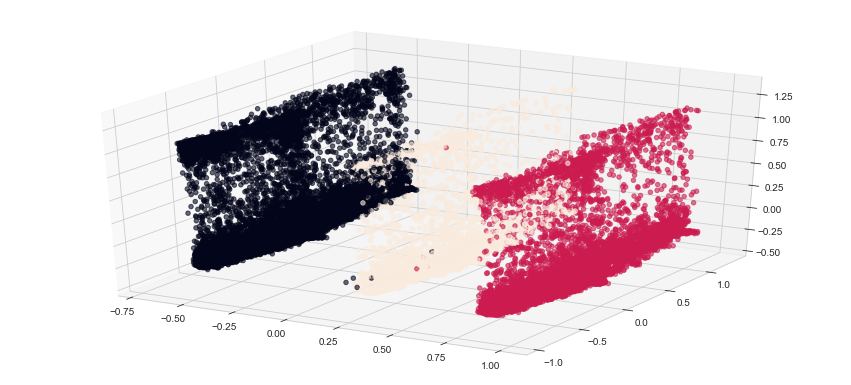

In [654]:
k_estimator = KMeans(n_clusters=3, random_state=42)
fitted_3 = k_estimator.fit_predict(pca_components)
pca_components = pd.DataFrame(pca_components)
pca_components['CLUSTER'] = fitted_3
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(211, projection='3d')
view = ax.scatter(pca_components[0],pca_components[1],pca_components[2],alpha=0.6,
          c=pca_components['CLUSTER'],)

plt.show()


In [655]:
customers['MACRO'] = customers.index.map(pca_components.set_index(pca_components.index)['CLUSTER'])
pca_components['subcluster'] = np.zeros(len(pca_components))

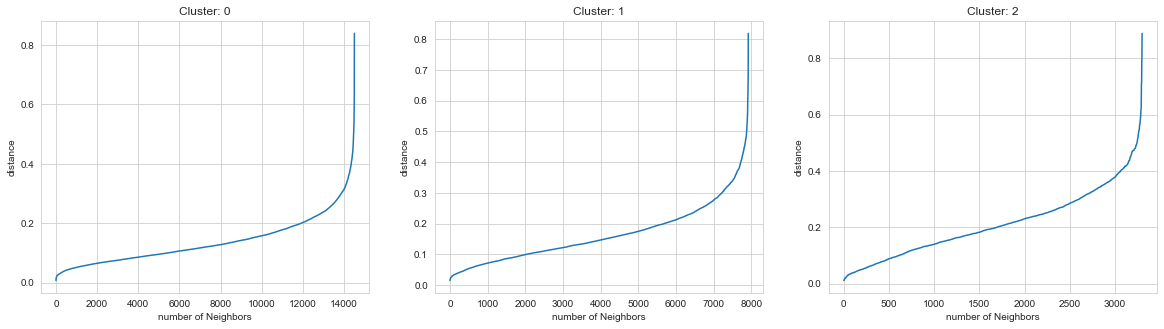

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [656]:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)
sns.set_style('darkgrid');
i=0
for cluster in np.sort(pca_components.CLUSTER.unique()):

    cluster_0 = pca_components[pca_components.CLUSTER == cluster]
    neigh = NearestNeighbors()
    nbrs = neigh.fit(cluster_0)
    distances, indices = nbrs.kneighbors(cluster_0)
    fig=plt.figure(figsize=(10,5))
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]

    ax[i].plot(distances);
    ax[i].set_title('Cluster: {}'.format(cluster));
    ax[i].set_xlabel('number of Neighbors');
    ax[i].set_ylabel('distance');
    i+=1
plt.show();

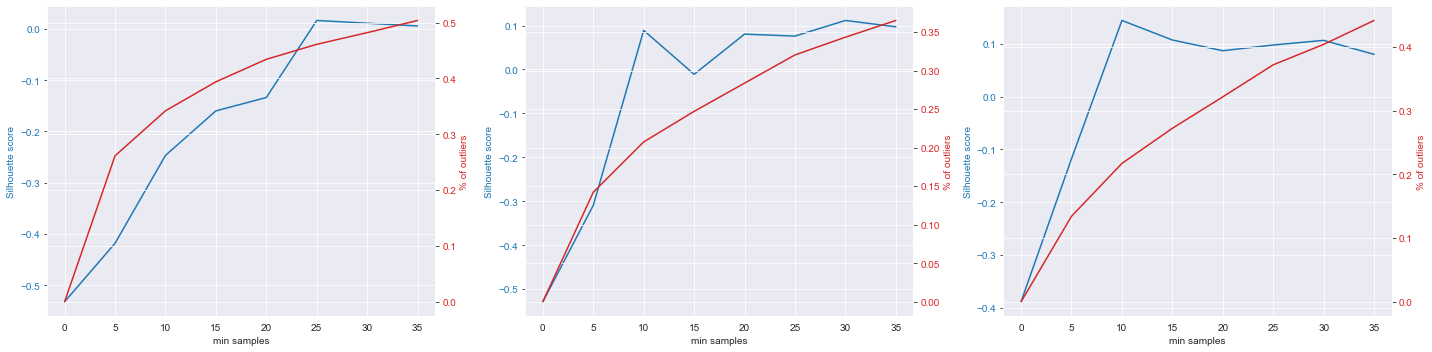

In [658]:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)
i=0
epss = [0.2,0.3,0.4]
for cluster in np.sort(pca_components.CLUSTER.unique()):
    cluster_0 = pca_components[pca_components.CLUSTER == cluster]
    score = []
    outliers = []
    samples = np.arange(0,40, 5)
    with tqdm(total=len(samples)) as pbar:
        for n in samples:
            dbs_estimator = DBSCAN(eps=epss[i], min_samples=n)
            dbs_estimator.fit(cluster_0)
            dbs_labels = dbs_estimator.labels_
            outliers_ = cl.Counter(dbs_labels)[-1]/(len(dbs_labels))
            score.append(silhouette_score(cluster_0,dbs_labels))
            outliers.append(outliers_)

            pbar.update(1)


    color = 'tab:blue'
    ax[i].set_xlabel('min samples')
    ax[i].set_ylabel('Silhouette score', color=color)
    ax[i].plot(samples,score, color=color)
    ax[i].tick_params(axis='y', labelcolor=color)

    ax2 = ax[i].twinx()  

    color = 'tab:red'
    ax2.set_ylabel('% of outliers', color=color)  
    ax2.plot(samples,outliers, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    i+=1
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,30))
sns.set_style('white');
                                    # cluster 0
cluster_0 = pca_components[pca_components.CLUSTER == 0]
dbs_estimator = DBSCAN(eps = epss[0], min_samples=30)
sub_cluster_0 = dbs_estimator.fit_predict(cluster_0)
pca_components.loc[cluster_0.index,'subcluster']=sub_cluster_0


                                # cluster 1
cluster_0 = pca_components[pca_components.CLUSTER == 1]
dbs_estimator = DBSCAN(eps = epss[1], min_samples=25)
dbs_labels = dbs_estimator.fit_predict(cluster_0)
cluster_0 = pd.DataFrame(cluster_0)
cluster_0['CLUSTER'] = dbs_labels

ax = fig.add_subplot(312, projection='3d')
view = ax.scatter(cluster_0[0],cluster_0[1],cluster_0[2],alpha=0.6,
          c=cluster_0['CLUSTER'],cmap="Set1")
fig.colorbar(view, shrink=0.5, aspect=10)
ax.set_title('Cluster 1, {} subclusters'.format(len(np.unique(dbs_labels))-1))

                                # cluster 2
cluster_0 = pca_components[pca_components.CLUSTER == 2]
dbs_estimator = DBSCAN(eps = epss[2], min_samples=15)
dbs_labels = dbs_estimator.fit_predict(cluster_0)
cluster_0 = pd.DataFrame(cluster_0)
cluster_0['CLUSTER'] = dbs_labels

ax = fig.add_subplot(313, projection='3d')
view = ax.scatter(cluster_0[0],cluster_0[1],cluster_0[2],alpha=0.6,
          c=cluster_0['CLUSTER'],cmap="Set1")
fig.colorbar(view, shrink=0.5, aspect=10)
ax.set_title('Cluster 2, {} subclusters'.format(len(np.unique(dbs_labels))-1))

plt.show()
